#***Yes Bank Stock Closing Price Prediction - Supervised ML Regression***

#Github Link - https://github.com/rubenslobo/Yes-Bank-Stock-Closing-Price-Prediction---Supervised-Regression-ML-Project-

#**Problem Description**

Time Series forecasting & modeling plays an important role in data analysis. Time series analysis is a specialized branch of statistics used extensively in fields such as Finance, Economics & Research.

Yes Bank is a well-known private sector bank in the Indian financial domain with its headquarters located in Mumbai, India. The bank is known for its technology-driven approach, expertise in digital banking, while offering a wide range of products and services for retail, MSME, and corporate clients. The bank also offers brokerage services through its subsidiary, YES Securities. The bank’s journey has been marked by both successes and setbacks as it strives to adapt to changing market conditions and regulatory needs

Yes Bank was founded in 1999 by Indian bankers Ashok Kapur, Harkikat Singh, and Rana Kapoor. They worked with Rabobank from the Netherlands, who owned a majority stake. In 2003, it was renamed as Yes Bank. A banking license was granted in 2004, and in 2005, the bank went public through an IPO.

The bank has a pan-India presence with 1,198 branches and 1,345 ATMs. It also has an international banking unit (IBU) at GIFT City and a representative office in Abu Dhabi.

The RBI Takeover!

In 2018, the bank’s financial health began to deteriorate due to asset quality issues and concerns regarding corporate governance. The bank has been in the news since 2018, especially because of the fraud case involving Rana Kapoor, the co-founder, former Managing Director, and CEO of the Bank. He played a significant role in its establishment and growth. However, he was ordered to step down from his position in January 2019.

In March 2020, Kapoor was arrested by India's Enforcement Directorate (ED) on accusations of financial fraud exceeding US$ 100 million. He was subsequently charged by the Central Bureau of Investigation (CBI) with bribery and money laundering related to his time at Yes Bank. These charges allege he misused his position to sanction substantial loans to financially troubled companies in exchange for kickbacks funneled through his family-controlled companies. His wife and daughters were also named as co-accused in a money laundering case. In 2020, the RBI took control of the Bank and fixed limits on withdrawals to protect depositors. Since then, Yes Bank has been restructured under a new management to regain trust and stability. A reconstruction scheme was implemented, involving an investment infusion of INR 12,000 crores, by investors including the State Bank of India, ICICI Bank, HDFC Bank, Axis Bank, Kotak Mahindra Bank, etc. State Bank of India took a 49% stake and was the lead participant. The bank has been focused on improving asset quality and strengthening its risk management framework.

Owing to this event, it was interesting to see how the said event impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing prices, opening prices, highest prices, and lowest stock prices of every month. The main objective is to predict the stock’s monthly closing price.



#**Understanding the Problem Statement**
With respect to the solution to the problem statement, it’s important to establish what we’re aiming to solve. We are going to conduct a stock price data analysis. However broadly speaking, stock price analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance based on analysis of yearly/quartely financial KPIs such as ratios and other metrics (Sales, Profits, EBITDA, etc). Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

Since, we only have the monthly stock price data of Yes Bank at our disposal, our data analysis focus will purely involve the technical analysis part.

So let's begin!


#**Data Description**

*   The dataset contains columns of data representing multiple variables - date, open, high, low and close.
*   The date column contains the month and the year of the price of the share.
*   The columns Open and Close represent the starting and final price at which the stock is traded in a particular month.
*   High and Low represent the maximum and minimum price of the share for the month.
*   The profit or loss calculation is usually determined by the closing price of a stock for the month, hence we will consider the closing price as the target variable.
*   If the closing price is more than the opening price for that particular month, then the result is a profit
*   If the closing price is less than the opening price for that particular month, then the result is a loss
*   Therefore, close price is going to be our target variable (dependent variable), while the rest of the columns (open, high, low) are independent variables

So now let's begin with the data analysis!


#**Importing the necessary libraries**

In [ ]:
#Importing all the required libraries and metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#**Mounting the drive and importing the dataset**

In [ ]:
# Mounting the drive first

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading and reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Assignment - Module 6/Yes Bank Stock Price Predictions/data_YesBank_StockPrices.csv')

In [ ]:
#Also making multiple copies of dataset so to avoid any data losses
df1 = df.copy()
stock_data = df.copy()

#**Exploratory Data Analysis**

In [ ]:
#Checking the head and tail of the data
stock_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
stock_data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#Checking the shape of the dataset
stock_data.shape

(185, 5)

As can be inferred from the above, we have **185 rows** and **5 columns**.

*Let us examine the dataset how actually it looks like* -


In [ ]:
#Checking the information about the types variables in the dataset about and null values.
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
stock_data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


<Axes: >

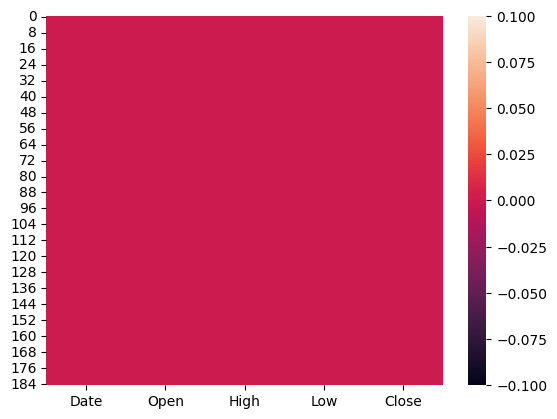

In [ ]:
# to check null values by visualization method
sns.heatmap(stock_data.isnull(),cbar=True)

We have 185 rows and 5 columns with zero non-null values, so we are good to go ahead!

In [ ]:
#Description of the data
stock_data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
# Getting the other copied file into our analysis
data3 = stock_data.drop(['Date'],axis=1)
print(data3)

      Open   High    Low  Close
0    13.00  14.00  11.25  12.46
1    12.58  14.88  12.55  13.42
2    13.48  14.87  12.27  13.30
3    13.20  14.47  12.40  12.99
4    13.35  13.88  12.88  13.41
..     ...    ...    ...    ...
180  25.60  28.30  11.10  11.95
181  12.00  17.16  11.85  14.37
182  14.30  15.34  12.75  13.15
183  13.30  14.01  12.11  12.42
184  12.41  14.90  12.21  14.67

[185 rows x 4 columns]


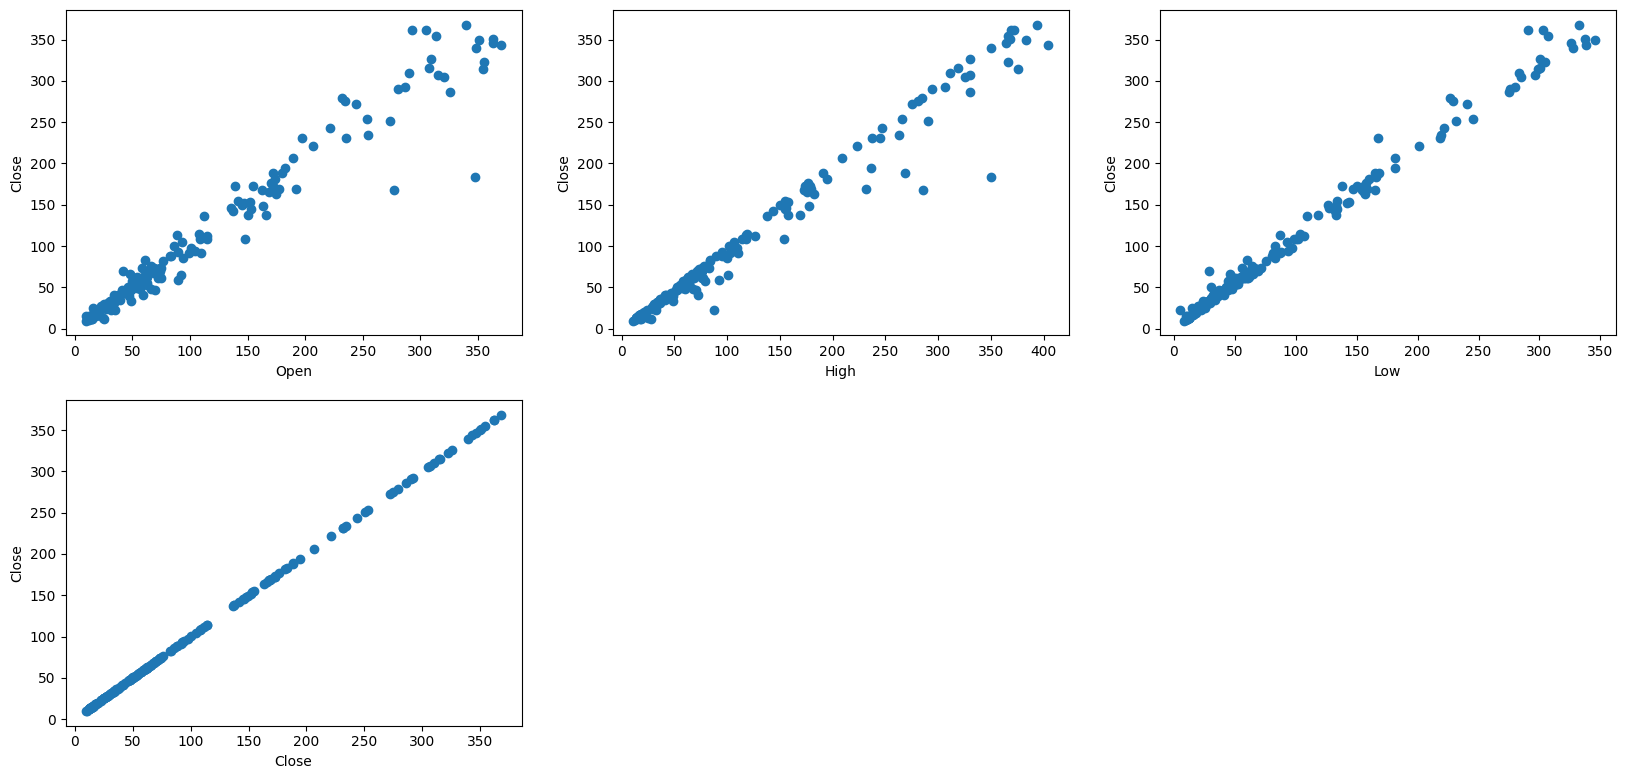

In [ ]:
#Plotting the scatter plot to find out linearity
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in data3:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(data3[feature], data3['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plotnumber+=1

plt.show()

As evident from the graphs, it seems the figures from the columns Open, Low and High are *linearly progressing* with Close.

#**Data Preprocessing**

**Let's first convert the Date into Datetime type from object type.**


In [ ]:
stock_data['Date'][0:5]

,Date
0,Jul-05
1,Aug-05
2,Sep-05
3,Oct-05
4,Nov-05


In [ ]:
#Since the datatype of column 'Date' is object, we are converting it to datetime type.
import pandas as pd
from datetime import datetime

def convert_to_datetime(val):
    if isinstance(val, str):
        return datetime.strptime(val, '%b-%y')
    elif pd.isnull(val):
        return pd.NaT
    else:
        return val  # Already datetime or Timestamp

# Example column: stock_data['Date'] = ['Jan-23', 'Feb-21', 'Dec-19']
stock_data['Date'] = stock_data['Date'].apply(convert_to_datetime)

In [ ]:
#Checking once again first few rows of our dataset to ensure whether the date datatype is changed or not.
stock_data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


*Now let us plot opening and closing stock prices with respect to year*

Text(0.5, 1.0, 'Closing price history')

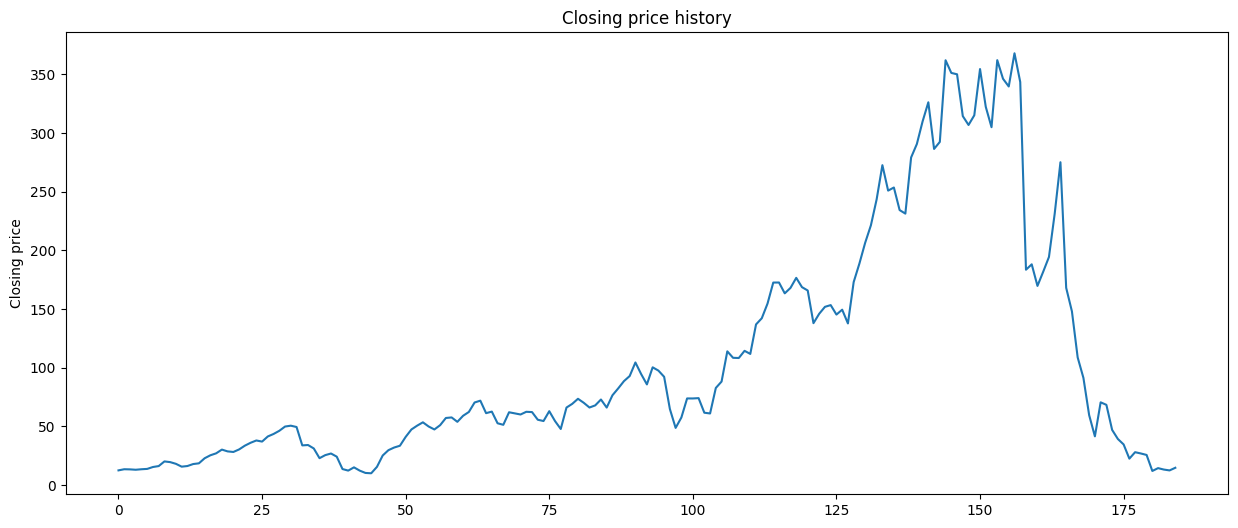

In [ ]:
# plotting closing price history
ax = stock_data['Close'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Closing price')
plt.title('Closing price history')

Text(0.5, 1.0, 'Opening Price History')

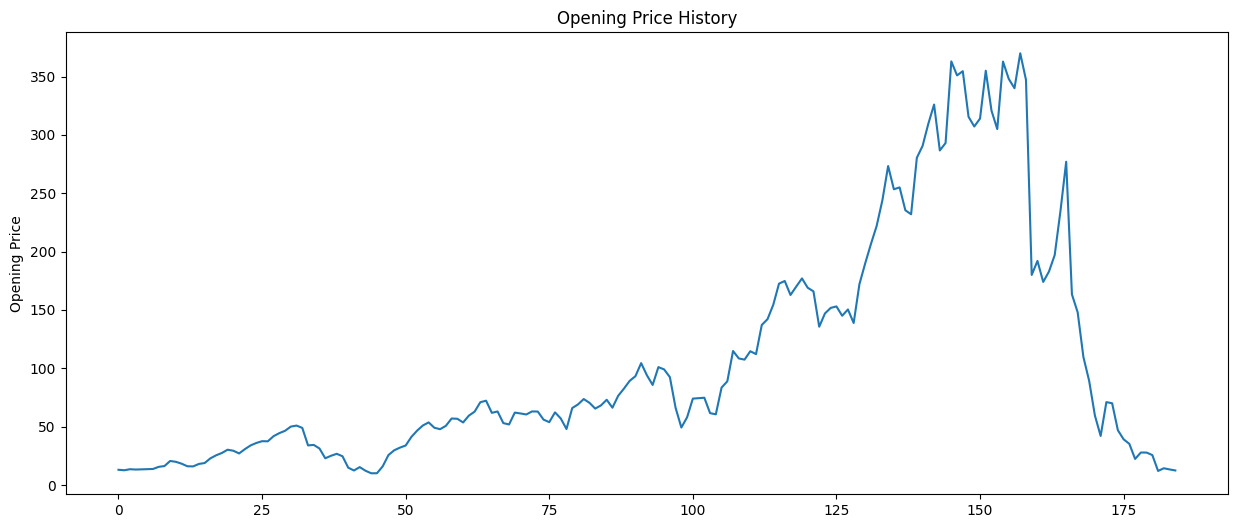

In [ ]:
#Plotting opening price history
ax = stock_data['Open'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Opening Price')
plt.title('Opening Price History')

From the above plotted graphs, we can deduce that the **opening and the closing** prices of the shares appear **almost same**, because they are very near in proximity.

In [ ]:
#Setting the column Date as the index
stock_data.set_index('Date',inplace=True)

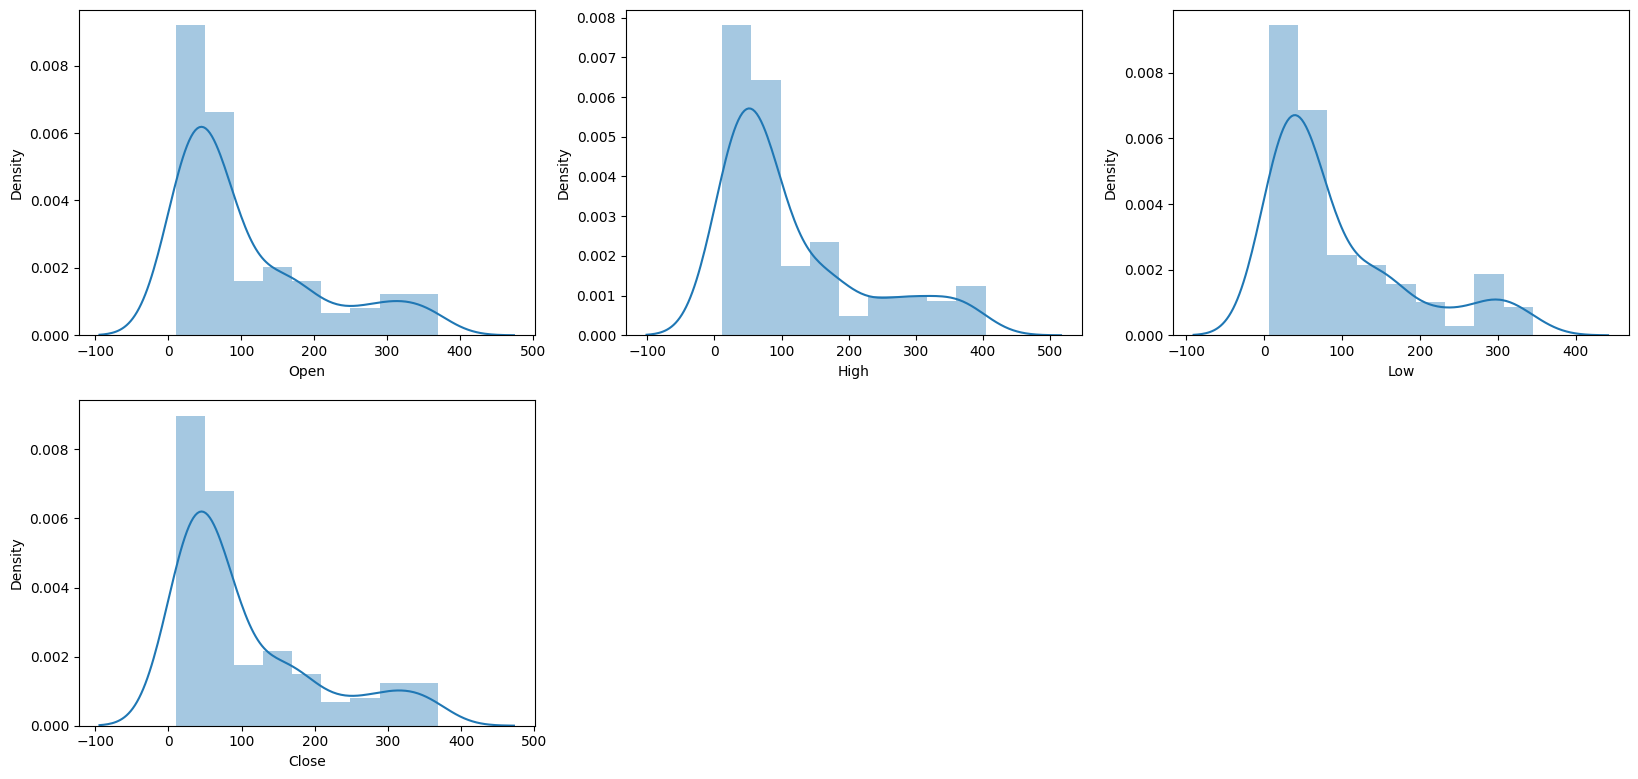

In [ ]:
#Plotting distplots for all the columns
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in stock_data[1:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(stock_data[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

From the above plotted graphs, we can deduce that our data seems to be positively skewed which means it needs normalization. We will do it after we create new features.

In [ ]:
stock_data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


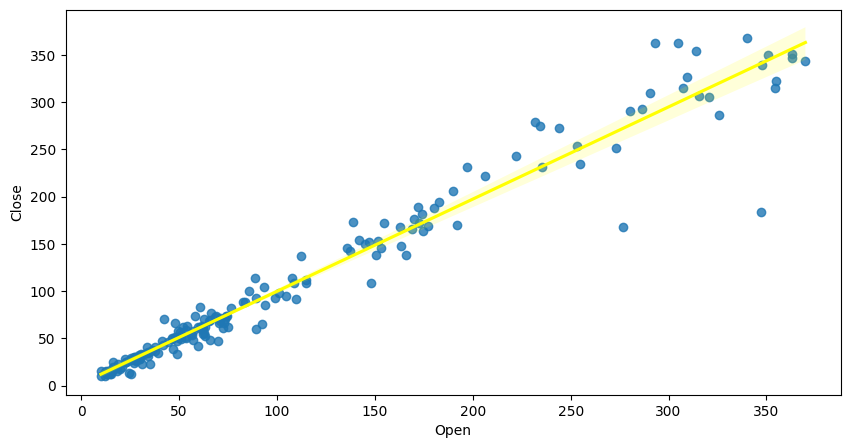

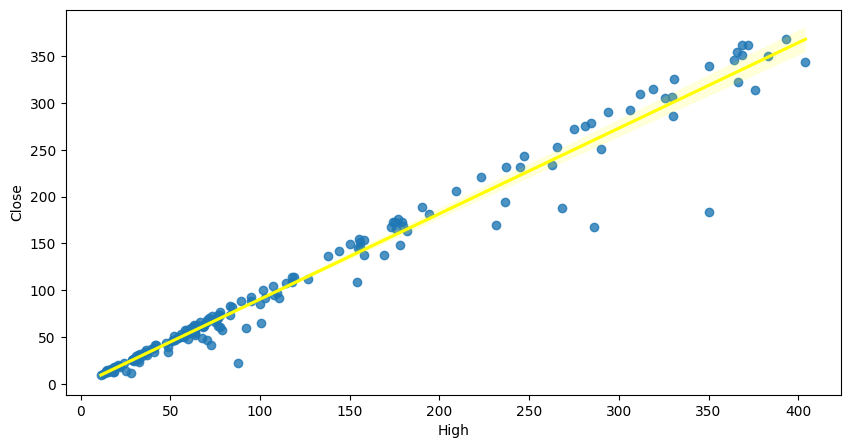

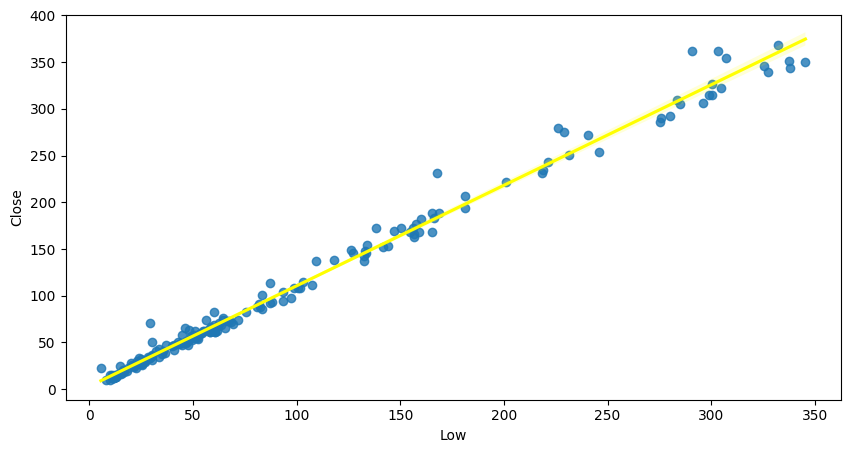

<Figure size 1000x500 with 0 Axes>

In [ ]:
# plotting Regression plot of each columns of dataset v/s  stock_data close column
for col in stock_data.columns.to_list()[:]:
  plt.figure(figsize=(10, 5))
  if col == 'Close':
    pass
  else:
    sns.regplot(x=stock_data[col],y=stock_data["Close"],line_kws={"color": "yellow"})

  plt.show()

We can clearly see that all the columns are **linear** with closing price.

In [ ]:
#Creating a new dataframe with only date and close columns for sake of simplicity and further implementation.
stockdf = stock_data['Close'].reset_index()

In [ ]:
stockdf['Date'] = pd.to_datetime(stockdf.Date,format='%Y-%m')

**Now let us create new columns Year, Month and Quarter for the further analysis**

In [ ]:
#Creating new columns Year,month and quarter.
stockdf['Year']= stockdf['Date'].dt.year
stockdf['Month']= stockdf['Date'].dt.month
stockdf['Quarter']=stockdf['Date'].dt.quarter

In [ ]:
stockdf=stockdf.set_index('Date')

In [ ]:
stockdf.head()

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3
2005-09-01,13.30,2005,9,3
2005-10-01,12.99,2005,10,4
2005-11-01,13.41,2005,11,4


Let us create few more **features** to get to know about the **differences** between **opening and closing** price and between **high and low** prices of the shares.

In [ ]:
s=stockdf.copy()

In [ ]:
t=stock_data.copy()
t.reset_index(inplace=True)

In [ ]:
t['Date'] = pd.to_datetime(t.Date,format='%Y-%m')
t['Month']= t['Date'].dt.month
t['Year']= t['Date'].dt.year
t['Quarter']= t['Date'].dt.quarter

**Getting insights of the datatype of this new dataframe**

In [ ]:
t1 = t.drop(["Date"], axis = 1)

In [ ]:
t=t.set_index('Date')

In [ ]:
#Normalising the data
from scipy.stats import boxcox
t['Close']=boxcox(t['Close'],0)
t['Open']=boxcox(t['Open'],0)
t['High']=boxcox(t['High'],0.5)
t['Low']=boxcox(t['Low'],0.5)


In [ ]:
#Creating new features
t['open-high'] = t['Open']-t['High']
t['open-low'] = t['Open'] - t['Low']
t['close-high'] = t['Close']-t['High']
t['close-low'] = t['Close'] - t['Low']
t['high-low'] = t['High'] - t['Low']
t['open-close'] = t['Open'] - t['Close']

**Plotting the newly created features and existing one also to view the distribution of data.**

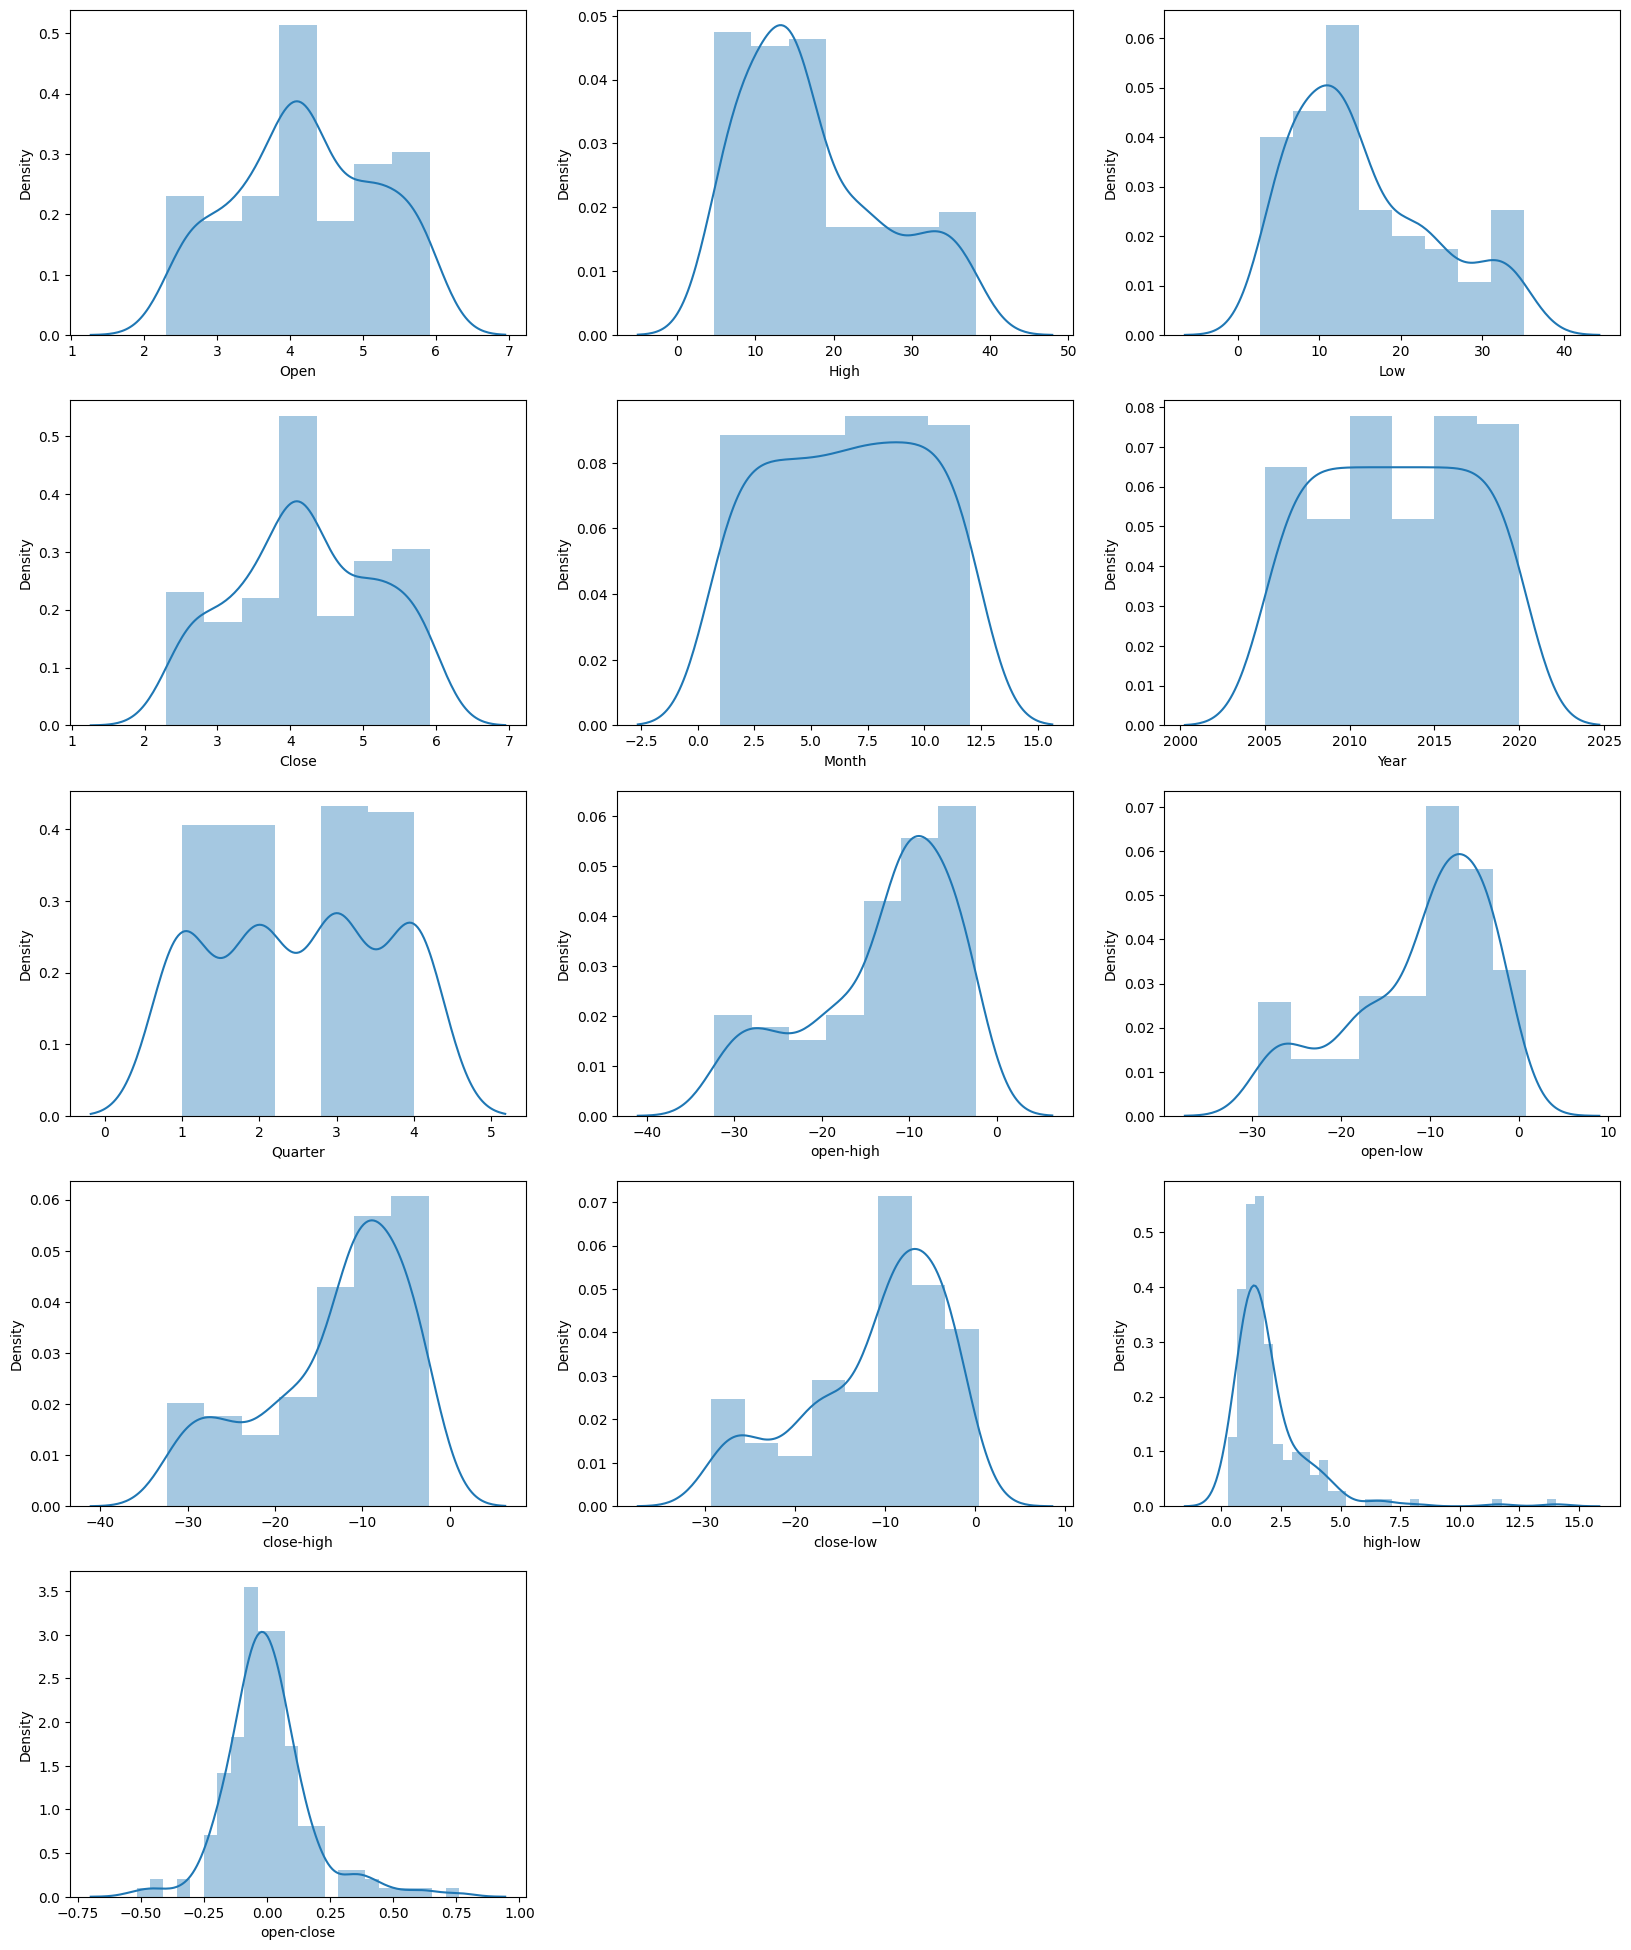

In [ ]:
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in t[:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(t[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

From the above plotted graphs we conclude that most of the graphs show a **normal distribution** amongst the various formulated columns.

<Axes: >

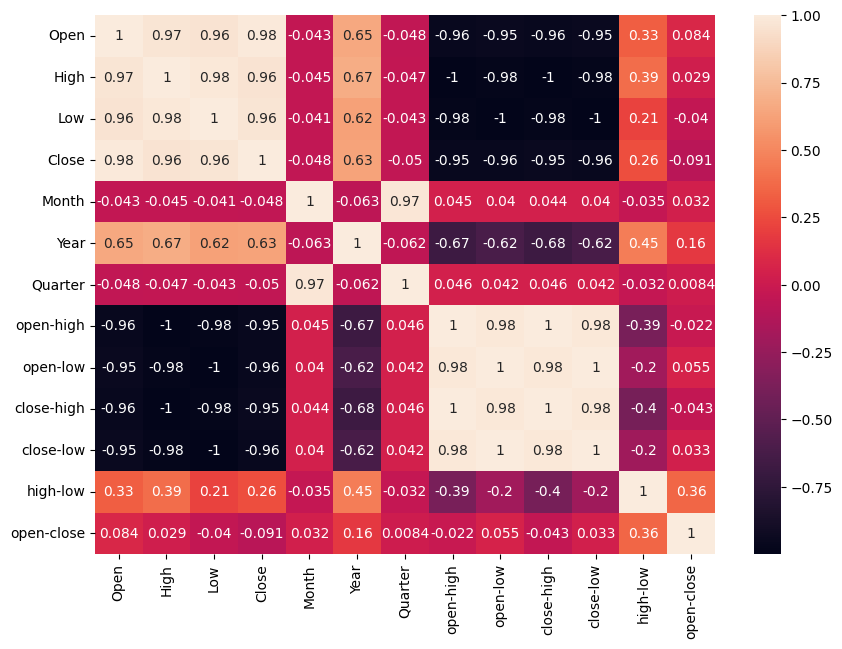

In [ ]:
#Plotting a correlation plot to figure out potential strong correlations
plt.figure(figsize=(10,7))
sns.heatmap(t.corr(),annot=True)

In [ ]:
#Keeping only columns that are not correlated
t=t[['Month','Year','high-low','open-close','Close']]

In [ ]:
#Checking for new information thus created
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       185 non-null    int32  
 1   Year        185 non-null    int32  
 2   high-low    185 non-null    float64
 3   open-close  185 non-null    float64
 4   Close       185 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 7.2 KB


In [ ]:
#Copying another piece of information
stk_df=stockdf.copy()

#**Data Training & Testing**


#Split the data into train and validation dataset

- Firstly we would identify and separate our **dependent** and **independent** variables.
- We would then use Time Series Split to split the data and then implement training models to find out which type of model provides the best model results.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
t1.head(2)

,Open,High,Low,Close,Month,Year,Quarter
0,13.00,14.00,11.25,12.46,7,2005,3
1,12.58,14.88,12.55,13.42,8,2005,3


In [ ]:
#Scaling down the data using MinMaxScaler from Scikit-Learn Module
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t1 = pd.DataFrame(scaler.fit_transform(t1), columns = t1.columns,index=t1.index)
t1.head()

,Open,High,Low,Close,Month,Year,Quarter
0,0.008334,0.007027,0.016767,0.006929,0.545455,0.0,0.666667
1,0.007168,0.009268,0.020591,0.009611,0.636364,0.0,0.666667
2,0.009668,0.009242,0.019768,0.009276,0.727273,0.0,0.666667
3,0.008890,0.008224,0.020150,0.008410,0.818182,0.0,1.000000
4,0.009307,0.006722,0.021562,0.009583,0.909091,0.0,1.000000


In [ ]:
#Independent features
x = t1.drop(['Close', 'Open', 'High', 'Low'], axis=1)

In [ ]:
x = np.random.permutation(x)

In [ ]:
#Dependent Feature
y=t1['Close']

#**Fitting Time series data**

In [ ]:
tscv = TimeSeriesSplit()

In [ ]:
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


**Splitting train test with timeseries split**

In [ ]:
for train_index, test_index in tscv.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] TEST: [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94] TEST: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
x_train.head()

,0,1,2
0,0.909091,1.000000,1.0
1,0.909091,0.866667,1.0
2,1.000000,0.866667,1.0
3,0.818182,0.266667,1.0
4,0.818182,0.400000,1.0


In [ ]:
#checking the shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((155, 3), (30, 3), (155, 1), (30, 1))

#**Creating a function for fitting the model evaluating the metrics**

In [ ]:
def train_model(model,x_train,y_train,x_test,y_test):

  model.fit(x_train,y_train)
  pred_value=model.predict(x_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Score: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(10,5))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 10})
  plt.show()

#1. Linear Regression

Evaluation matrix-- 
 MSE: 0.09133707757934582
 RMSE: 0.30222024680577875
 r2Score: -0.011922090164680377
 adj_r2: -0.12868233133752804

Evaluation Graph


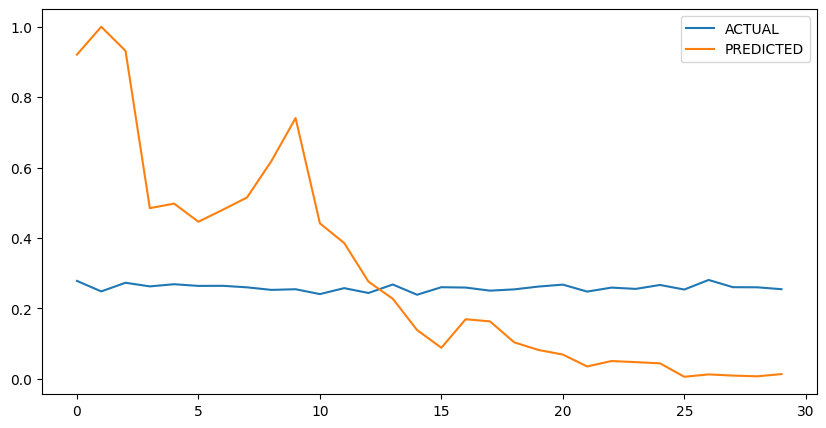

In [ ]:
#Beginning with Linear Regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,x_train,y_train,x_test,y_test)

We can see an underfit, when comparing both the actual and predicted data, hence we can conclude that linear regression is not suitable (R2 score is in the negative (below 0), so let us try something else, more possibly something like Random Forest.

#2. Random Forest

Evaluation matrix-- 
 MSE: 0.10289902746737861
 RMSE: 0.32077878275749255
 r2Score: -0.1400167567245303
 adj_r2: -0.271557151731207

Evaluation Graph


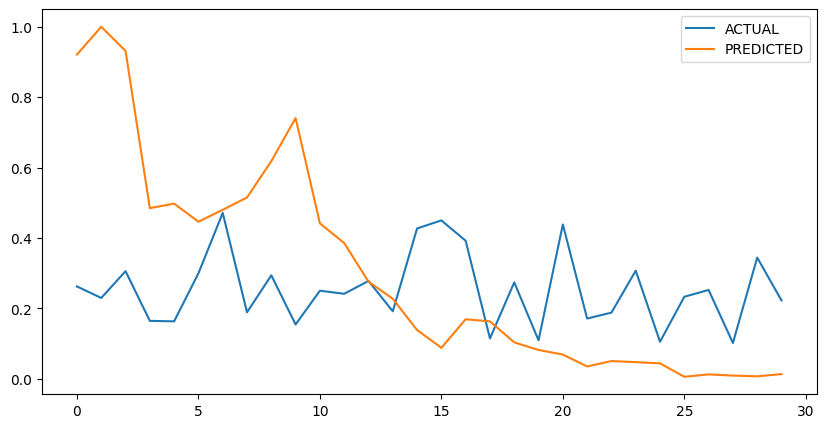

RandomForestRegressor(max_depth=15, max_leaf_nodes=40)

In [ ]:
rf_model = RandomForestRegressor()
#Defining the hypertuning parameters
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


train_model(rf_grid,x_train,y_train,x_test,y_test)
rf_grid.best_estimator_

From the above plotted graph, we can conclude that even Random Forest has failed to match up when we have the time series split in consideration, hence we will now go for another type of split. The R2 score is in negative (less than 0).

##**Split using train test split for uncorrelated variables**

In [ ]:
#Using the MinMaxScaler and train-test split to gauge a better analysis
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t2=pd.DataFrame(scaler.fit_transform(t), columns=t.columns,index=t.index)
t2.head()

,Month,Year,high-low,open-close,Close
Date,,,,,
2005-07-01,0.545455,0.0,0.036430,0.437543,0.061527
2005-08-01,0.636364,0.0,0.025872,0.353841,0.082103
2005-09-01,0.727273,0.0,0.031456,0.414885,0.079613
2005-10-01,0.818182,0.0,0.021184,0.416913,0.073075
2005-11-01,0.909091,0.0,0.000000,0.400869,0.081896


In [ ]:
X = t2.drop('Close',axis=1)
Y = t2['Close']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state =0)

In [ ]:
X_train.head(2)

,Month,Year,high-low,open-close
Date,,,,
2014-12-01,1.000000,0.600000,0.107085,0.338503
2006-03-01,0.181818,0.066667,0.063597,0.236511


We would now carry out Linear Regression and other techniques in a subsequence -

#1. Linear Regression

Evaluation matrix-- 
 MSE: 0.03362028565316659
 RMSE: 0.1833583531044239
 r2Score: 0.5570593317493646
 adj_r2: 0.5016917482180352

Evaluation Graph


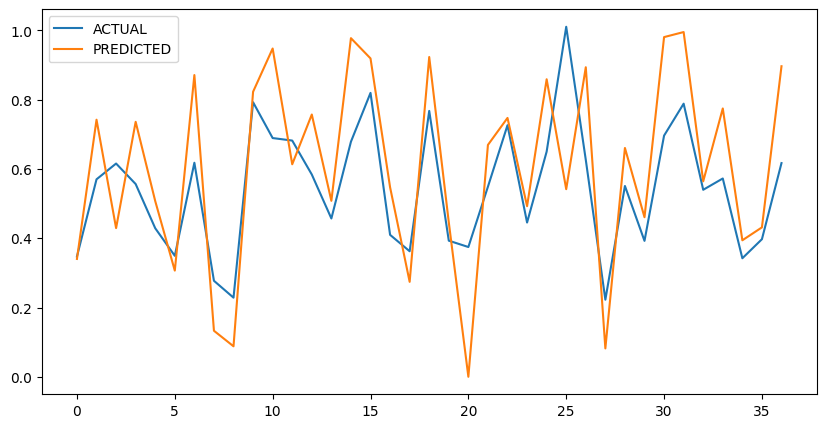

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,X_train,Y_train,X_test,Y_test)

*Linear Regression has now shown an r2 score of 53 which is much better as compared to the earlier type of timeseries split model.*

*So we will further use Regularization models.*

#2. Ridge Method

Evaluation matrix-- 
 MSE: 0.03444493232428609
 RMSE: 0.18559345981010777
 r2Score: 0.5461947736267918
 adj_r2: 0.4894691203301408

Evaluation Graph


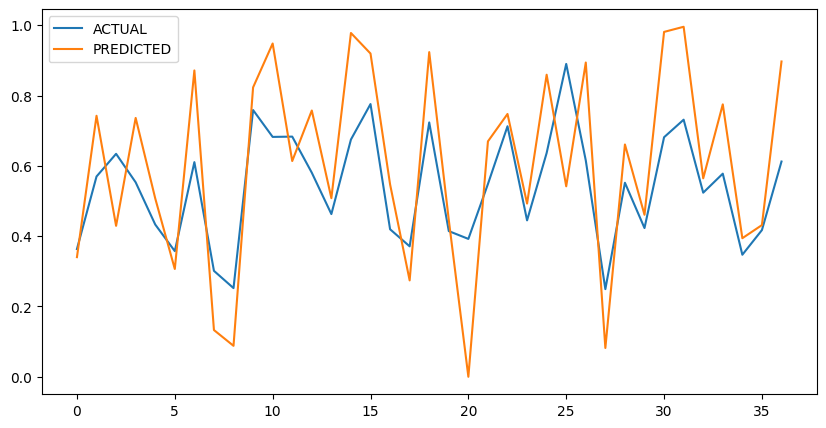

In [ ]:
rid=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(rid, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_regressor,X_train,Y_train,X_test,Y_test)

#3. Lasso

Evaluation matrix-- 
 MSE: 0.04078344052329692
 RMSE: 0.2019491037942405
 r2Score: 0.46268617151836355
 adj_r2: 0.395521942958159

Evaluation Graph


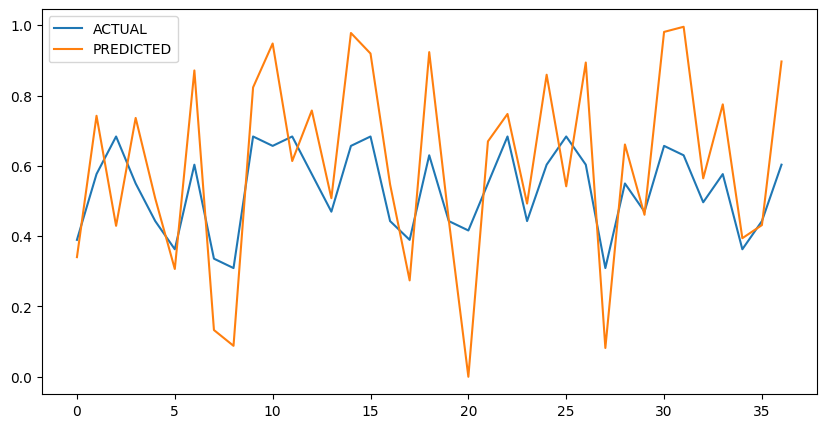

In [ ]:
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(lasso_regressor,X_train,Y_train,X_test,Y_test)

#3. Elastic Net

Evaluation matrix-- 
 MSE: 0.03617764661283466
 RMSE: 0.19020422343584975
 r2Score: 0.5233666027785515
 adj_r2: 0.4637874281258705

Evaluation Graph


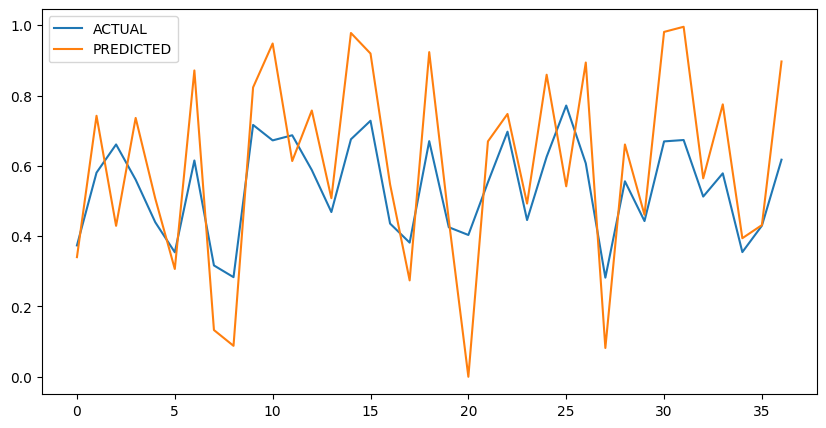

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
train_model(elastic_regressor,X_train,Y_train,X_test,Y_test)

#4. Random Forest

Evaluation matrix-- 
 MSE: 0.0065185126343423015
 RMSE: 0.08073730633568538
 r2Score: 0.9141198747672199
 adj_r2: 0.9033848591131224

Evaluation Graph


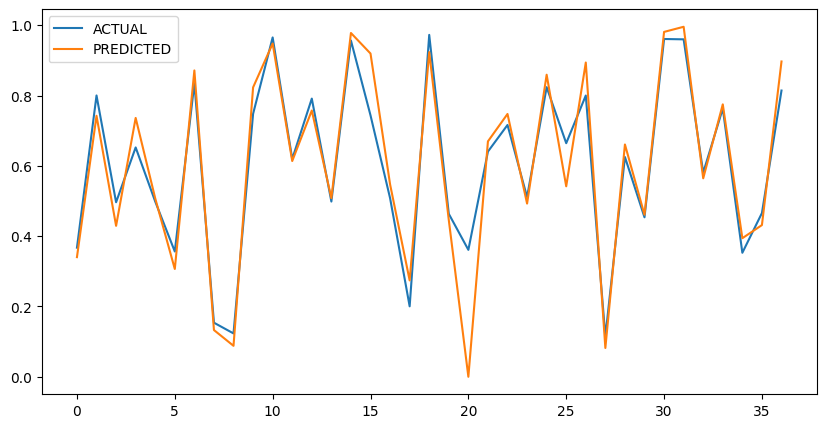

In [ ]:
rf_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,Y_train,X_test,Y_test)

#5. Gradient Boost

Evaluation matrix-- 
 MSE: 0.007171927884463328
 RMSE: 0.0846872356643156
 r2Score: 0.9055112570261477
 adj_r2: 0.8937001641544161

Evaluation Graph


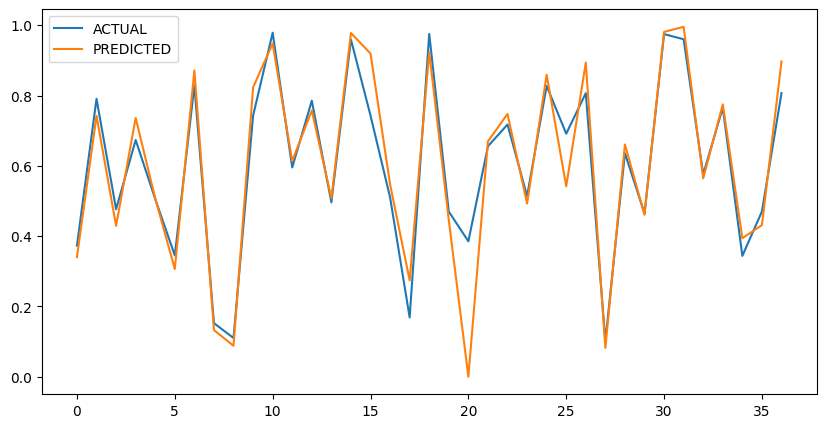

In [ ]:
gb_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(gb_grid,X_train,Y_train,X_test,Y_test)

#6. XG Boost

Evaluation matrix-- 
 MSE: 0.007455082251847114
 RMSE: 0.08634281818337362
 r2Score: 0.9017807537817397
 adj_r2: 0.8895033480044572

Evaluation Graph


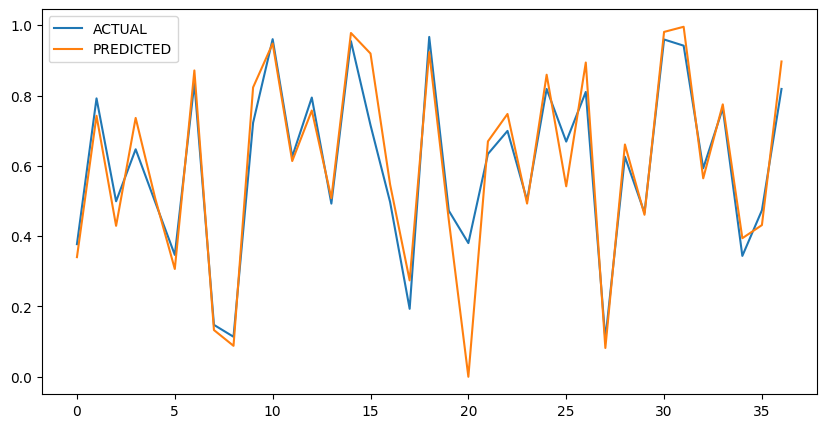

In [ ]:
xg=XGBRegressor()
xg_grid=GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(xg_grid,X_train,Y_train,X_test,Y_test)

#7. K Nearest Neighbours

Evaluation matrix-- 
 MSE: 0.01629087060468155
 RMSE: 0.1276356948689572
 r2Score: 0.7853709755335575
 adj_r2: 0.7585423474752522

Evaluation Graph


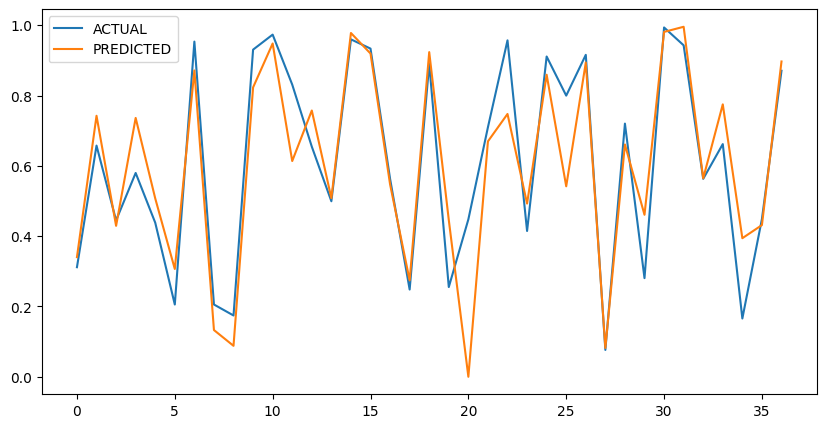

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
nn={ 'n_neighbors': [1, 2, 3], 'p': [1, 2, 3] }
knn_grid= GridSearchCV(knn,param_grid=nn,verbose=0,cv=3)
train_model(knn_grid,X_train,Y_train,X_test,Y_test)

#8. Support Vector Regression

Evaluation matrix-- 
 MSE: 0.023691935484492468
 RMSE: 0.15392184862615335
 r2Score: 0.6878633975953853
 adj_r2: 0.6488463222948084

Evaluation Graph


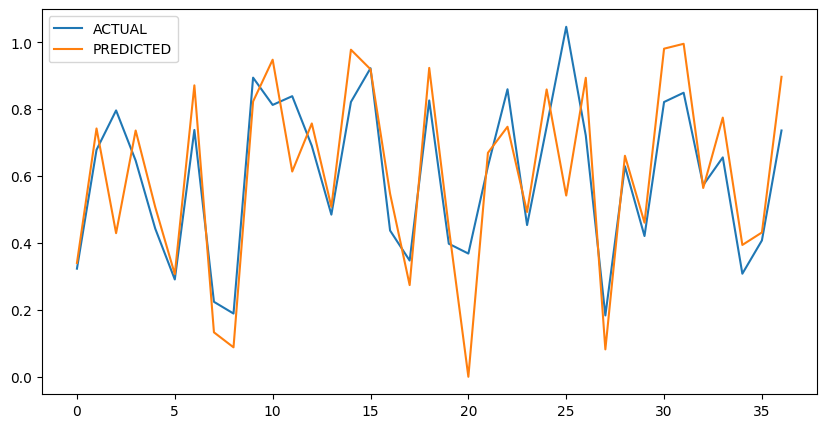

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear') # using linear kernel
train_model(svm_regressor,X_train,Y_train,X_test,Y_test)

As from the obsevations  determined above, We can infer that Random Forest is performing well over the other models in case of test_train_split.

Now we will do the further **analysis** of this dataset using **FbProphet** library

#**FBProphet Library**

In [ ]:
#Visualizing the necessary data
stockdf.head(2)

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3


In [ ]:
stockdata = stockdf.drop(['Year', 'Month', 'Quarter'], axis = 1)

In [ ]:
print(stockdata)

            Close
Date             
2005-07-01  12.46
2005-08-01  13.42
2005-09-01  13.30
2005-10-01  12.99
2005-11-01  13.41
...           ...
2020-07-01  11.95
2020-08-01  14.37
2020-09-01  13.15
2020-10-01  12.42
2020-11-01  14.67

[185 rows x 1 columns]


In [ ]:
#Spliting dataset to test and train
split_date = '2014-01-01'
stock_price_train = stockdata.loc[stockdata.index <= split_date].copy()
stock_price_test = stockdata.loc[stockdata.index > split_date].copy()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_g8wh2b4/yguk2rgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_g8wh2b4/15gbxqya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63988', 'data', 'file=/tmp/tmp_g8wh2b4/yguk2rgk.json', 'init=/tmp/tmp_g8wh2b4/15gbxqya.json', 'output', 'file=/tmp/tmp_g8wh2b4/prophet_model2d80pj9h/prophet_model-20250808145547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


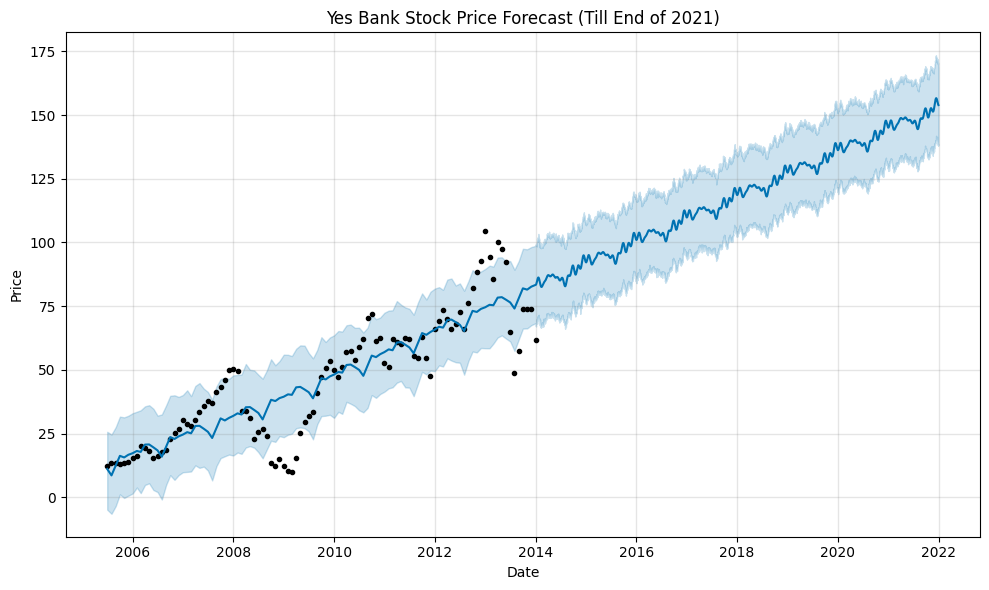

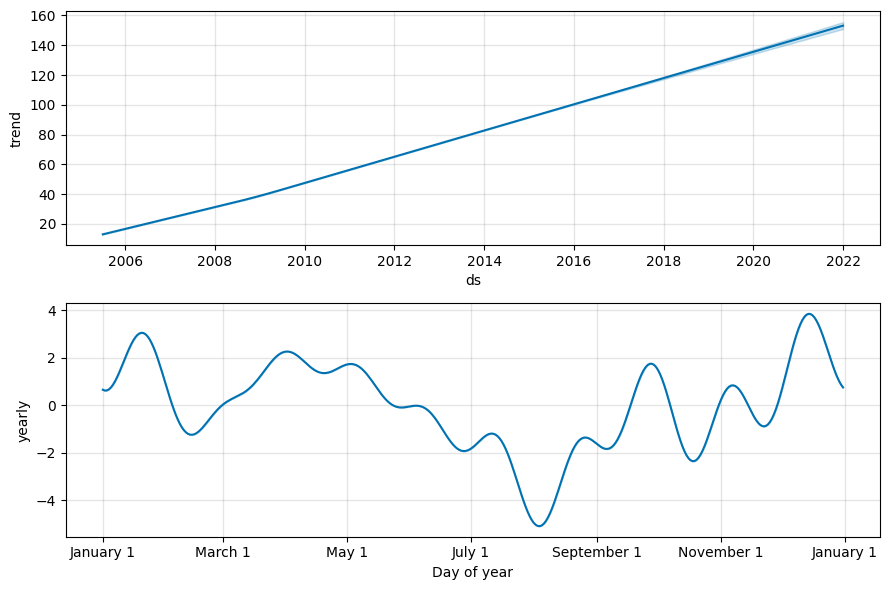

In [ ]:
# STEP 1: Install Prophet (only run once)
!pip install prophet

# STEP 2: Import Prophet (after installing)
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# STEP 3: Prepare data
df_prophet = stock_price_train.reset_index().rename(columns={"Date": "ds", "Close": "y"})[["ds", "y"]]

# STEP 4: Fit model
model = Prophet()
model.fit(df_prophet)

# 🆕 STEP 5: Calculate days until 2021-12-31
last_train_date = df_prophet["ds"].max()
end_forecast_date = pd.to_datetime("2021-12-31")
periods = (end_forecast_date - last_train_date).days

# STEP 6: Create future DataFrame and forecast
future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future)

# STEP 7: Plot forecast
fig1 = model.plot(forecast)
plt.title("Yes Bank Stock Price Forecast (Till End of 2021)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Forecast Components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()



In [ ]:
stock_price_train.shape

(103, 1)

In [ ]:
stock_price_test.shape

(82, 1)

In [ ]:
# Merge forecast with actual test data
actual = stock_price_test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds"})
merged = pd.merge(forecast[["ds", "yhat"]], actual, on="ds", how="inner")

# Compute MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(merged["Close"], merged["yhat"])

# RMSE
mse = mean_squared_error(merged["Close"], merged["yhat"])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 108.77
RMSE: 128.67
MAE: 108.77
RMSE: 128.67


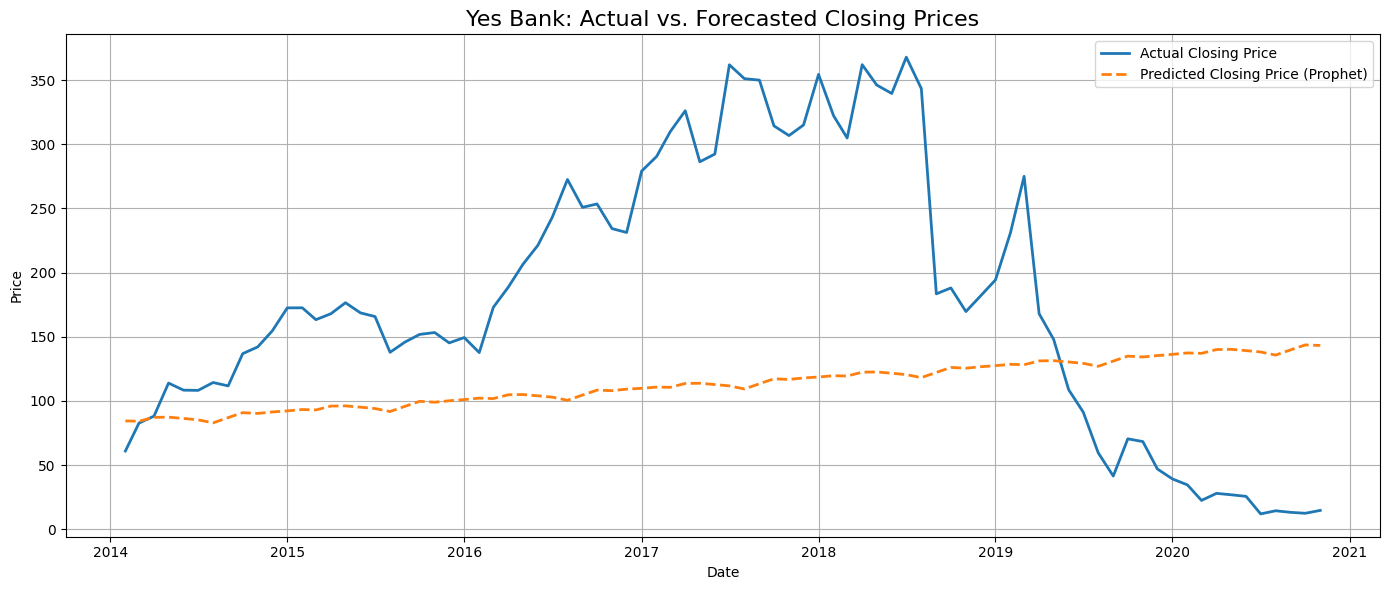

In [ ]:
# Combining the forecasts and the actuals to form a plotted graph

import matplotlib.pyplot as plt

# Merge forecast with actual test data
actual = stock_price_test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds"})
merged = pd.merge(forecast[["ds", "yhat"]], actual, on="ds", how="inner")

# Plot forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(merged['ds'], merged['Close'], label='Actual Closing Price', linewidth=2)
plt.plot(merged['ds'], merged['yhat'], label='Predicted Closing Price (Prophet)', linewidth=2, linestyle='--')
plt.title('Yes Bank: Actual vs. Forecasted Closing Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


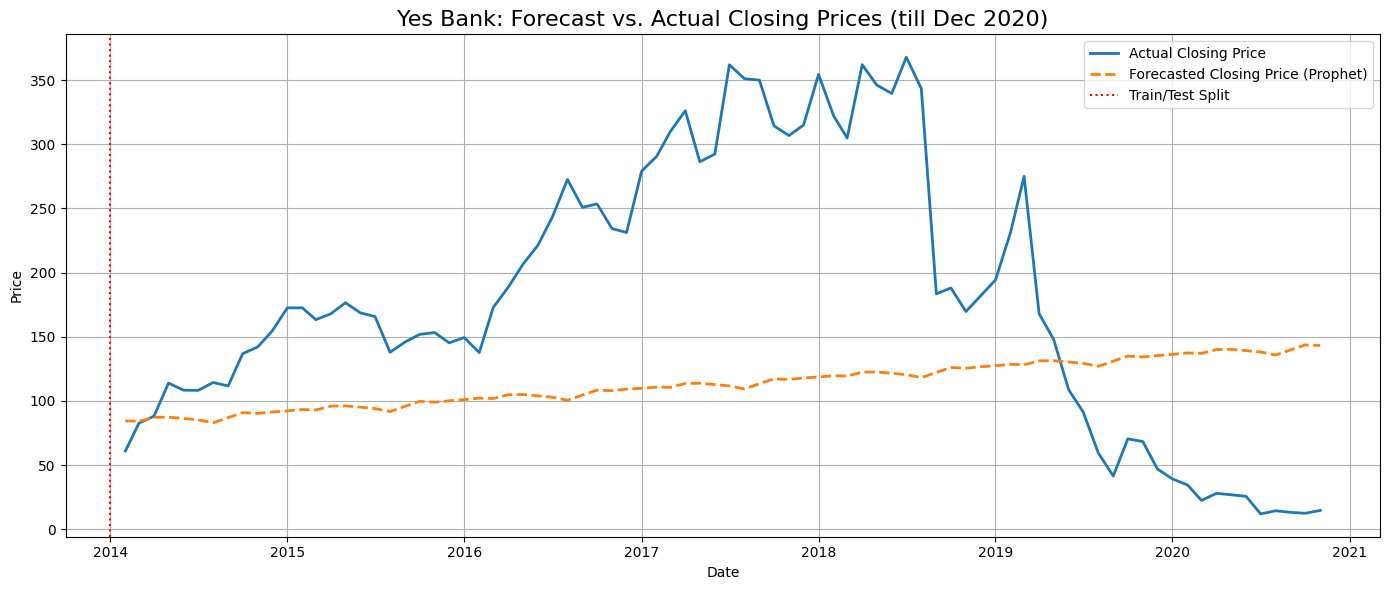

In [ ]:
#Second way of plotting an actual vs forecasts graph
import matplotlib.pyplot as plt
import pandas as pd

# 1. Make sure forecast goes up to Dec 2020
# Replace 180 with correct number of days from the last training date to Dec 31, 2020
last_train_date = stock_price_train.index.max()
end_forecast_date = pd.to_datetime("2020-12-31")
days_to_forecast = (end_forecast_date - last_train_date).days

future = model.make_future_dataframe(periods=days_to_forecast)
forecast = model.predict(future)

# 2. Merge forecast with actuals
actual = stock_price_test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds"})
merged = pd.merge(forecast[["ds", "yhat"]], actual, on="ds", how="inner")  # outer to include all forecasted dates

# 3. Plot both actuals and forecasts
plt.figure(figsize=(14, 6))
plt.plot(merged['ds'], merged['Close'], label='Actual Closing Price', linewidth=2)
plt.plot(merged['ds'], merged['yhat'], label='Forecasted Closing Price (Prophet)', linewidth=2, linestyle='--')
plt.axvline(x=last_train_date, color='red', linestyle=':', label='Train/Test Split')
plt.title('Yes Bank: Forecast vs. Actual Closing Prices (till Dec 2020)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


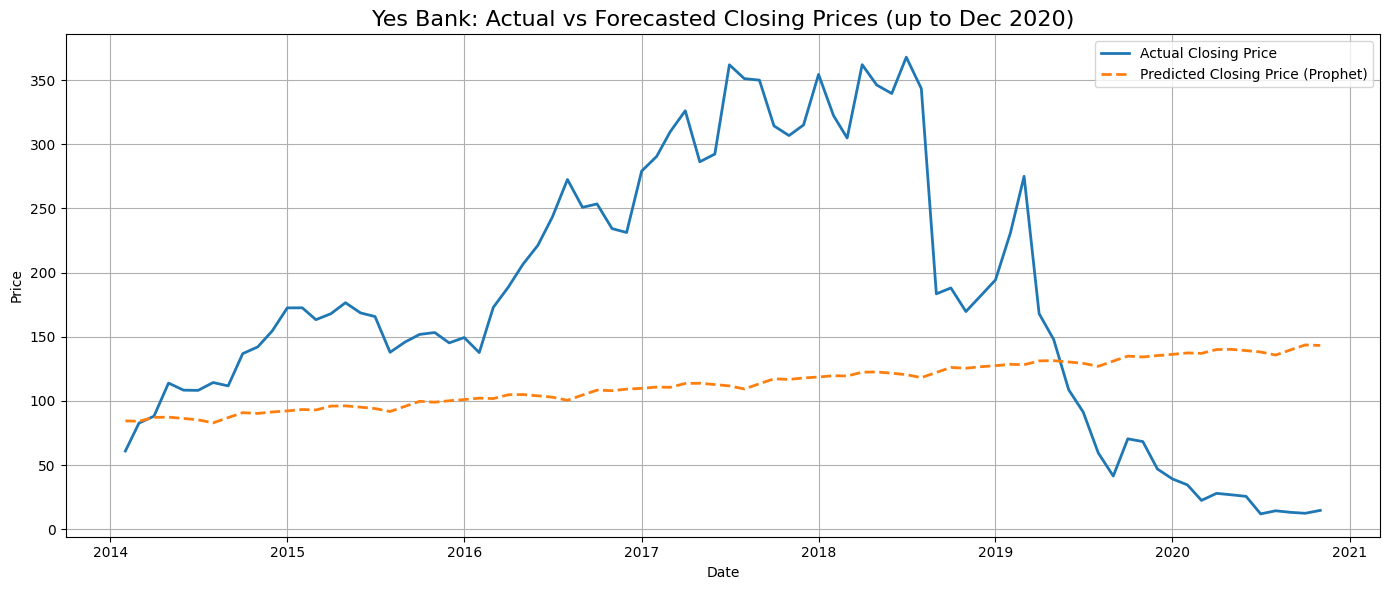

In [ ]:
# Third way of showing the same above plot
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Extend future dates until Dec 31, 2020
last_date = pd.to_datetime("2020-12-31")
future = model.make_future_dataframe(periods=(last_date - df_prophet["ds"].max()).days)

# STEP 2: Make forecast
forecast = model.predict(future)

# STEP 3: Prepare actual data
actual = stock_price_test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds"})

# STEP 4: Merge with forecast (outer join to keep all dates)
combined = pd.merge(forecast[["ds", "yhat"]], actual, on="ds", how="inner").sort_values("ds")

# STEP 5: Plot combined forecast vs actuals
plt.figure(figsize=(14, 6))
plt.plot(combined['ds'], combined['Close'], label='Actual Closing Price', linewidth=2)
plt.plot(combined['ds'], combined['yhat'], label='Predicted Closing Price (Prophet)', linewidth=2, linestyle='--')

# Formatting
plt.title('Yes Bank: Actual vs Forecasted Closing Prices (up to Dec 2020)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


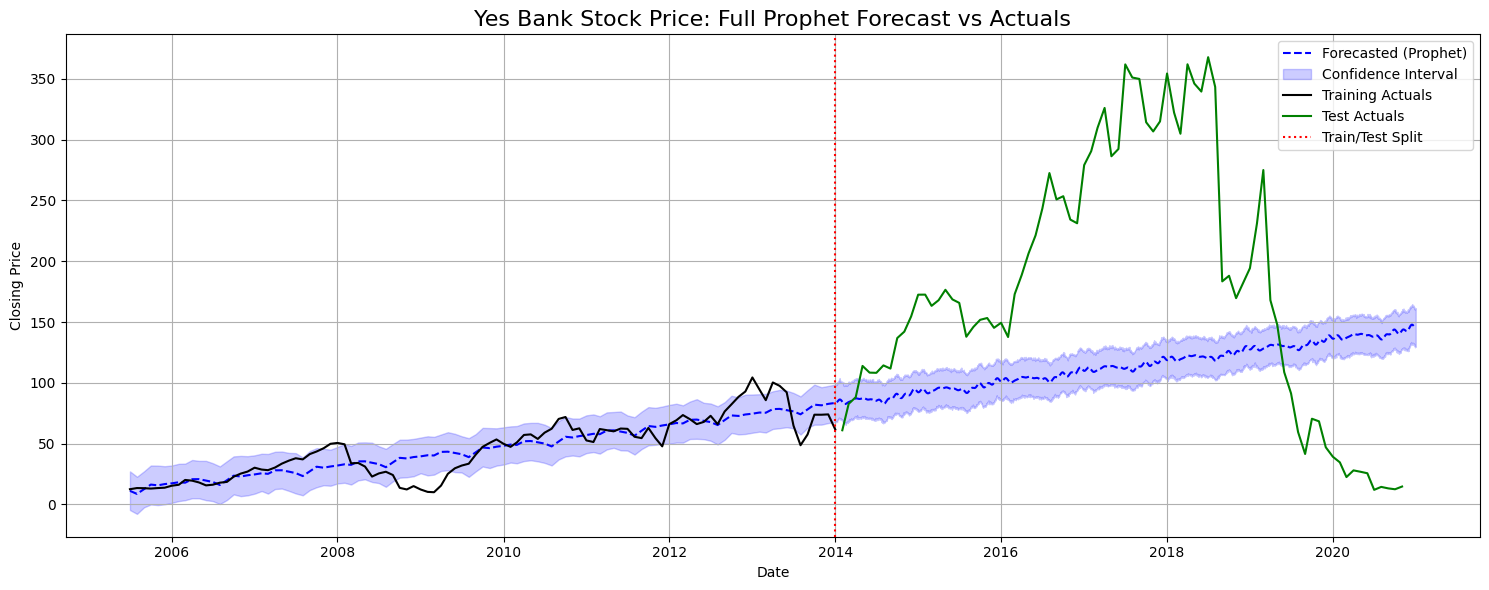

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Forecast till Dec 2020
last_train_date = stock_price_train.index.max()
end_forecast_date = pd.to_datetime("2020-12-31")
periods = (end_forecast_date - last_train_date).days

future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future)

# STEP 2: Prepare actual test data
actual = stock_price_test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds"})

# STEP 3: Plot full forecast + test set actuals
plt.figure(figsize=(15, 6))

# Prophet forecast (fitted + predicted)
plt.plot(forecast["ds"], forecast["yhat"], label="Forecasted (Prophet)", linestyle="--", color="blue")

# Plot lower & upper bounds for forecast (optional)
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"],
                 alpha=0.2, color="blue", label="Confidence Interval")

# Overlay actual training + test set
plt.plot(stock_price_train.reset_index()["Date"], stock_price_train["Close"], label="Training Actuals", color="black")
plt.plot(actual["ds"], actual["Close"], label="Test Actuals", color="green")

# Add vertical line for train/test split
plt.axvline(x=last_train_date, color='red', linestyle=':', label='Train/Test Split')

# Labels & styling
plt.title("Yes Bank Stock Price: Full Prophet Forecast vs Actuals", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##**Creating multiple lag columns and creating regression model**

In [ ]:
##**Creating multiple lag columns and creating regression model** -
data = pd.DataFrame(df.copy())
data.head(2)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42


In [ ]:
# Only apply if 'Date' is not in standard format
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    data['Date'] = pd.to_datetime("01-" + data['Date'], format="%d-%b-%y")

data.head(1)

,Date,Open,High,Low,Close
0,2005-07-01,13.0,14.0,11.25,12.46


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'],inplace = True)
data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
stock_data_copy1=stockdata.copy()
stock_data_copy1.rename(columns = {'Close':'y'},inplace=True)
stock_data_copy1.head(2)

,y
Date,
2005-07-01,12.46
2005-08-01,13.42


In [ ]:
for i in range(6, 13):
    stock_data_copy1["lag_{}".format(i)] = stock_data_copy1.y.shift(i)

In [ ]:
# Ensure Date is a column before merging
stock_data_copy1 = stock_data_copy1.reset_index()
data = data.reset_index()

stock_data_copy1 = pd.merge(stock_data_copy1, data[['Date','Open','High','Low']], on='Date', how='left')
stock_data_copy1.set_index('Date', inplace=True)  # restore index if needed

stock_data_copy1.tail(5)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,Open,High,Low
Date,,,,,,,,,,,
2020-07-01,11.95,39.20,46.95,68.30,70.45,41.45,59.50,91.30,25.60,28.30,11.10
2020-08-01,14.37,34.55,39.20,46.95,68.30,70.45,41.45,59.50,12.00,17.16,11.85
2020-09-01,13.15,22.45,34.55,39.20,46.95,68.30,70.45,41.45,14.30,15.34,12.75
2020-10-01,12.42,27.95,22.45,34.55,39.20,46.95,68.30,70.45,13.30,14.01,12.11
2020-11-01,14.67,26.85,27.95,22.45,34.55,39.20,46.95,68.30,12.41,14.90,12.21


In [ ]:
y = stock_data_copy1.dropna().y
X = stock_data_copy1.dropna().drop(['y'], axis=1)

In [ ]:
final_data = stock_data_copy1.dropna()
X = final_data.drop('y', axis=1)
y = final_data['y']

In [ ]:
split_date = '2014-12-01'
X_train = X.loc[X.index <= split_date].copy()
X_test  = X.loc[X.index >  split_date].copy()
y_train = y.loc[y.index <= split_date].copy()
y_test  = y.loc[y.index >  split_date].copy()

Let's test the above data in our data models, first beginning with Linear Regression

#1. Linear Regression

Evaluation matrix-- 
 MSE: 165.96868067576068
 RMSE: 12.882883243892287
 r2Score: 0.9861874544836052
 adj_r2: 0.9838853635642061

Evaluation Graph


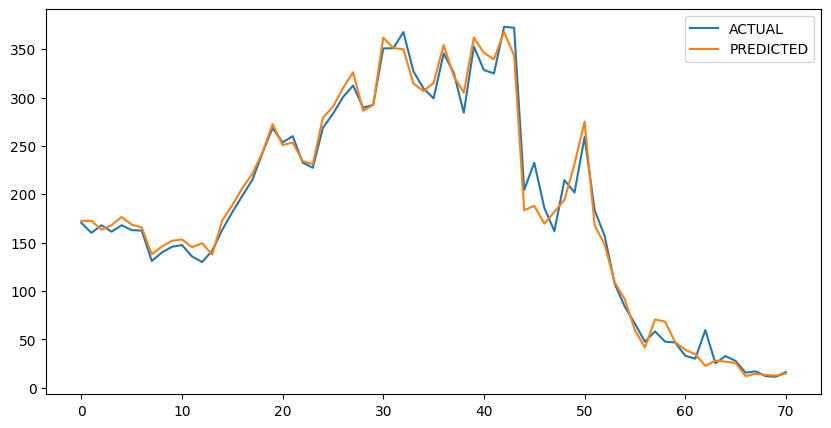

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Linear Reggression
lr = LinearRegression()
train_model(lr,X_train,y_train,X_test,y_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies

    """

    prediction = model.predict(X_test)

    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)

    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

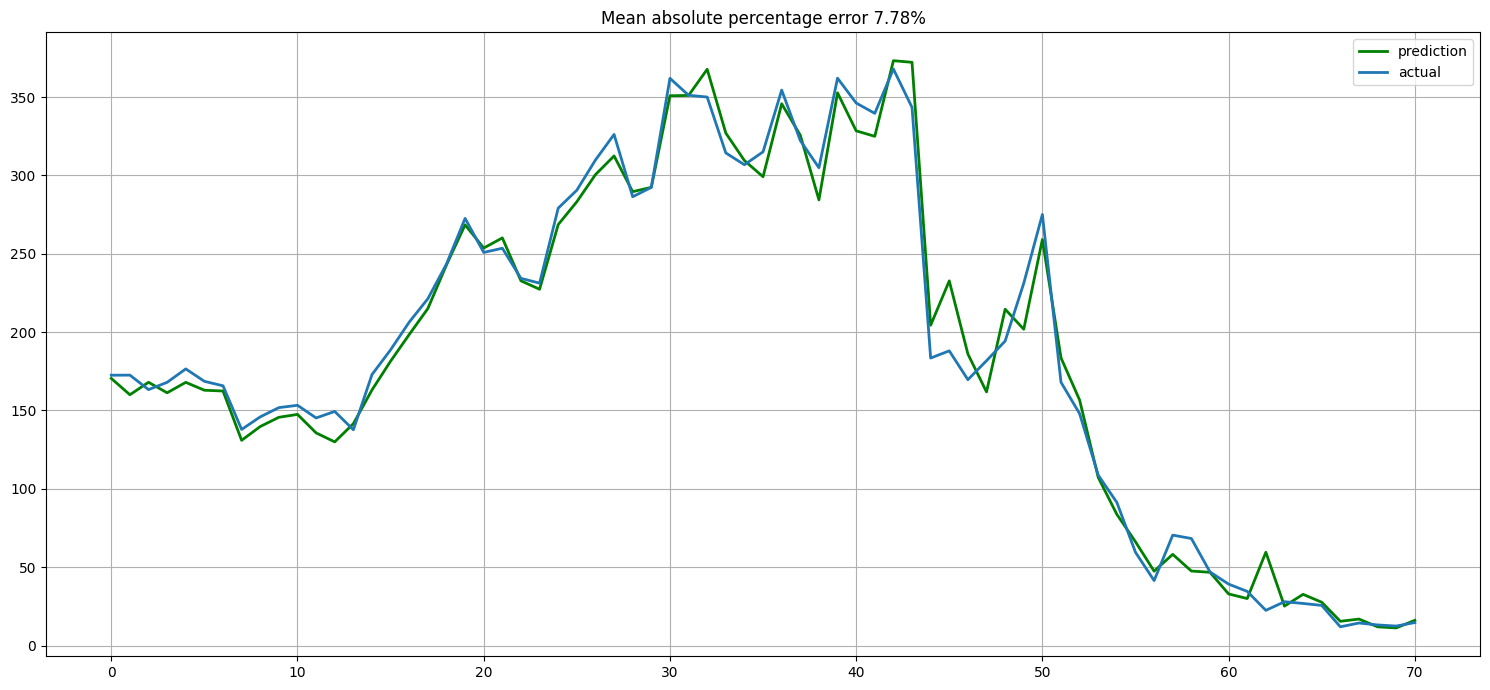

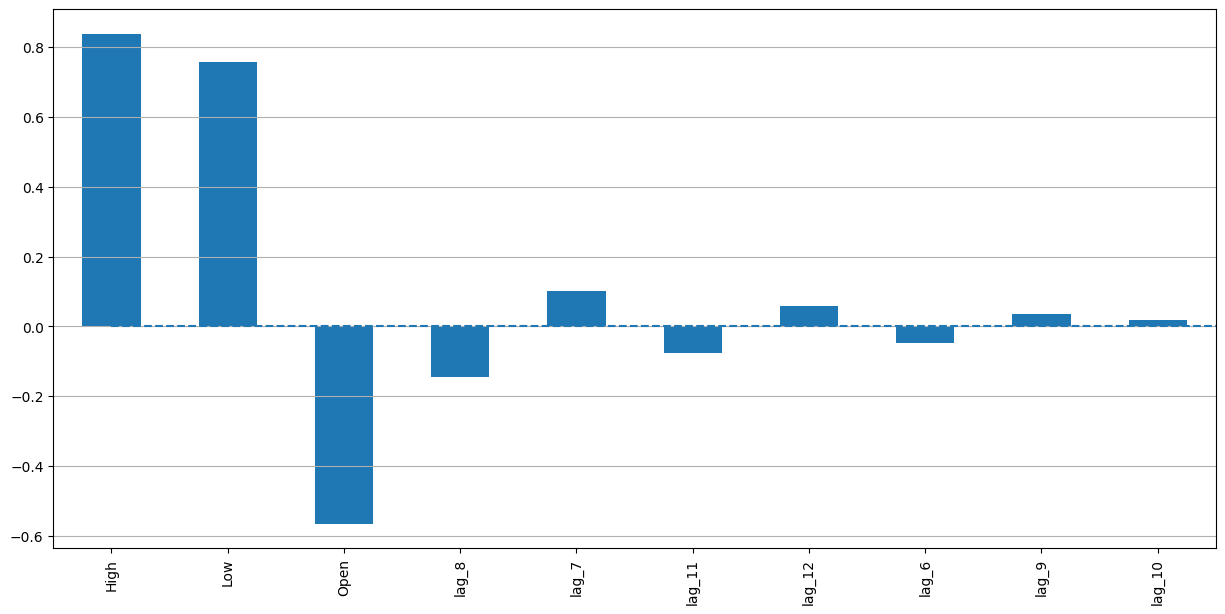

In [ ]:
plotModelResults(lr)
plotCoefficients(lr)


A Mean Absolute Percentage Error (MAPE) score of 7.78% is a good score, affirming acceptability of the linear regression model.

#2. Bayesian Ridge

Evaluation matrix-- 
 MSE: 166.2861613425271
 RMSE: 12.895199158699608
 r2Score: 0.9861610325337383
 adj_r2: 0.9838545379560281

Evaluation Graph


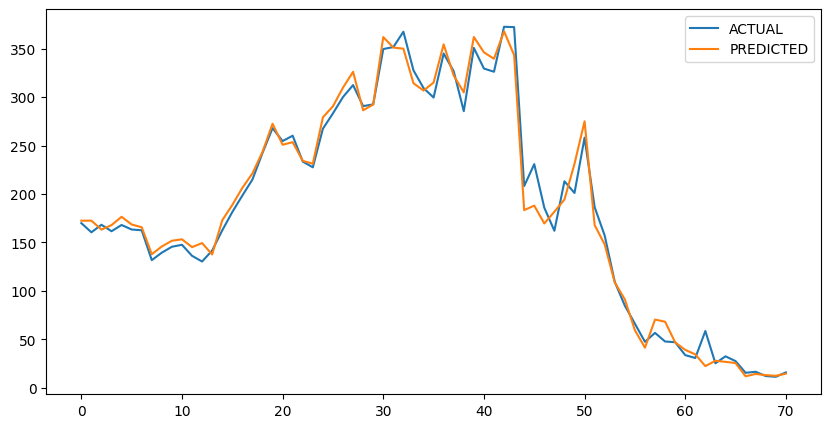

In [ ]:
from sklearn.linear_model import BayesianRidge
# Creating and training model
bridge = BayesianRidge()
train_model(bridge,X_train,y_train,X_test,y_test)

The data models of Bayesian Ridge and Linear Regression both yield the same results, and their respective R2 scores are excellent (~ 0.98).

Let's now proceed with Random Forest.

#3. Random Forest

Evaluation matrix-- 
 MSE: 10914.37564923559
 RMSE: 104.47188927762141
 r2Score: 0.09166410298449335
 adj_r2: -0.059725213184757875

Evaluation Graph


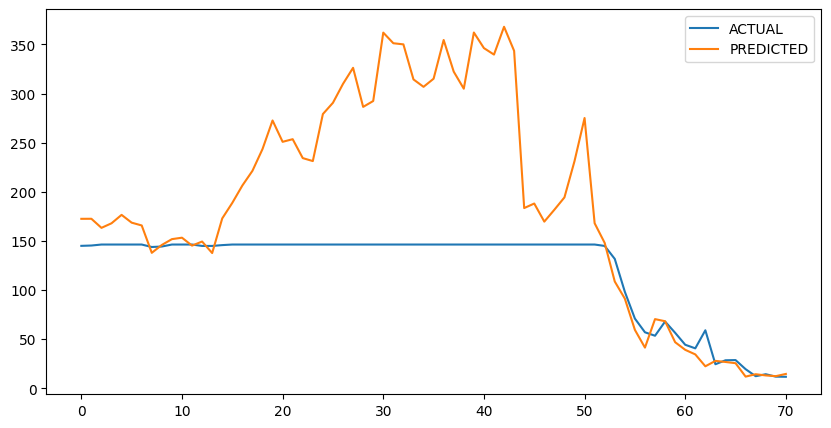

In [ ]:
#Importing Random forest regressor and implementing Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,y_train,X_test,y_test)

The R2 Score for Random Forest appears much lower than that of the acceptable range (0.5 – 0.7), which is undesirable.

In [ ]:
optimal_rf_model=rf_grid.best_estimator_

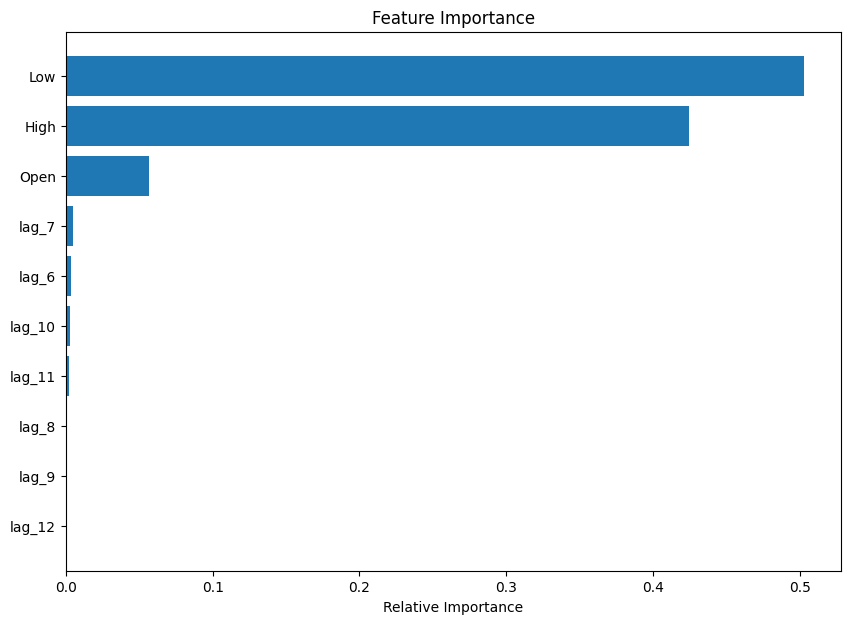

In [ ]:
X_imputed_df = pd.DataFrame(X_train, columns = X.columns)
features = X_imputed_df.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the above graph, it is clear that Random Forest has failed to assign importance to the lags statistics, and the original stats (especially Low and High data) still stand out as weights of higher importance, while the other features are given almost zero importance resulting in feature imbalance. Hence, Random Forest combined with Prophet is not exactly suitable for analysis.

#Time Series Analysis of Yes Bank Stock Prices Using Auto Arima and SARIMAX

Let's load specific forecasting tools first -

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

Installing the pmdarima package in order to use autoarima

In [ ]:
!pip install --upgrade pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
# import os
# os.kill(os.getpid(), 9)

# For some reason Numpy and pmdarima modules are incompatible with each other
# We tried running the above code (import os) as a counter to pmdarima's incompatability issues with our Python environment (version (3.11.13))
# The above code usually restarts the runtime to cleanly reload numpy + pmdarima
# We executed the above code once to ensure compatibility between numpy and pmdarima, which however is not possible as
# Google Colab's current python environment (Version 3.11) doesn't allow upgrading or downgrading of its Numpy module in
# compatibility with pmarima

In [ ]:
# Checking current Python version just to ensure compatibility/non-compatibilty of pmdarima
!python --version

# Since we have python 3.11 as our environment, pmdarima would not exactly function as stable as we would want it to
#Hence running the below code for better code stability by completely eliminating pmdarima

# 1. importing the necesssary modules for adfuller and SARIMAX instead
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assume `series` is your closing price time series
# Let's assume your training set is:
# E.g., series = stock_price_train["Close"]

series = stock_price_train['Close']

# ✅ 2. Check for stationarity (ADF Test)
# Step 0: Run the ADF test and print the formatted results
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Lags Used: {result[2]}')
print(f'Observations: {result[3]}')
print(f'Critical Values: {result[4]}')
if result[1] > 0.05:
    print("Non-stationary series — differencing required.")
    d = 1
else:
    print("Series is stationary.")
    d = 0


Python 3.11.13
ADF Statistic: -1.5992011818639675
p-value: 0.48399473269493654
Lags Used: 2
Observations: 100
Critical Values: {'1%': np.float64(-3.497501033), '5%': np.float64(-2.89090644), '10%': np.float64(-2.5824349)}
Non-stationary series — differencing required.


In [ ]:
#Since p-value = 0.48, which is more than the threshold of 0.05, we go in for first-order differencing

#Step - 0.1 - # First-order differencing
df['Close_diff1'] = df['Close'].diff()

# Drop the first NaN
df_diff1 = df['Close_diff1'].dropna()

# Re-run ADF test on differenced series
adf_result_diff1 = adfuller(df_diff1)

# Format results
print(f'ADF Statistic: {adf_result_diff1[0]}')
print(f'p-value: {adf_result_diff1[1]}')
print(f'Lags Used: {adf_result_diff1[2]}')
print(f'Observations: {adf_result_diff1[3]}')
print(f'Critical Values: {adf_result_diff1[4]}')
if adf_result_diff1[1] > 0.05:
    print("Non-stationary series — differencing required.")
    d = 1
else:
    print("Series is stationary.")
    d = 0



ADF Statistic: -2.0566081474846984
p-value: 0.2623166235310916
Lags Used: 14
Observations: 169
Critical Values: {'1%': np.float64(-3.469648263987657), '5%': np.float64(-2.878798906308495), '10%': np.float64(-2.5759713094779593)}
Non-stationary series — differencing required.


In [ ]:
#Since p-value = 0.2623, which is more than the threshold of 0.05, we go in for second-order differencing
#to check if we can further reduce p-value
# Step - 0.2 - # Second-order differencing
df['Close_diff2'] = df['Close_diff1'].diff()

# Drop the first NaN
df_diff2 = df['Close_diff2'].dropna()

# Re-run ADF test on differenced series
adf_result_diff2 = adfuller(df_diff2)

# Format results
print(f'ADF Statistic: {adf_result_diff2[0]}')
print(f'p-value: {adf_result_diff2[1]}')
print(f'Lags Used: {adf_result_diff2[2]}')
print(f'Observations: {adf_result_diff2[3]}')
print(f'Critical Values: {adf_result_diff2[4]}')
if adf_result_diff2[1] > 0.05:
    print("Non-stationary series — differencing required.")
    d = 2
else:
    print("Series is stationary.")
    d = 0


ADF Statistic: -6.058351845983125
p-value: 1.2295785955121453e-07
Lags Used: 13
Observations: 169
Critical Values: {'1%': np.float64(-3.469648263987657), '5%': np.float64(-2.878798906308495), '10%': np.float64(-2.5759713094779593)}
Series is stationary.


                               SARIMAX Results                                
Dep. Variable:            Close_diff1   No. Observations:                  184
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -815.434
Date:                Fri, 08 Aug 2025   AIC                           1636.867
Time:                        14:56:31   BIC                           1646.496
Sample:                             0   HQIC                          1640.770
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0422      0.055      0.762      0.446      -0.066       0.151
ma.L1         -0.9811      0.023    -41.749      0.000      -1.027      -0.935
sigma2       426.8695     13.990     30.512      0.0

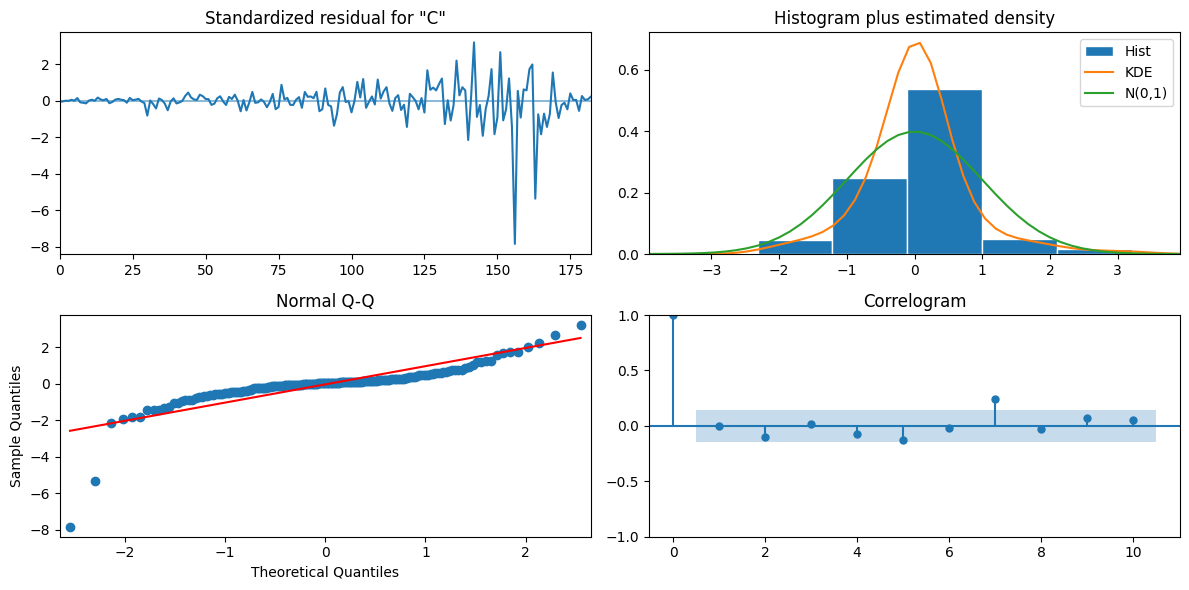

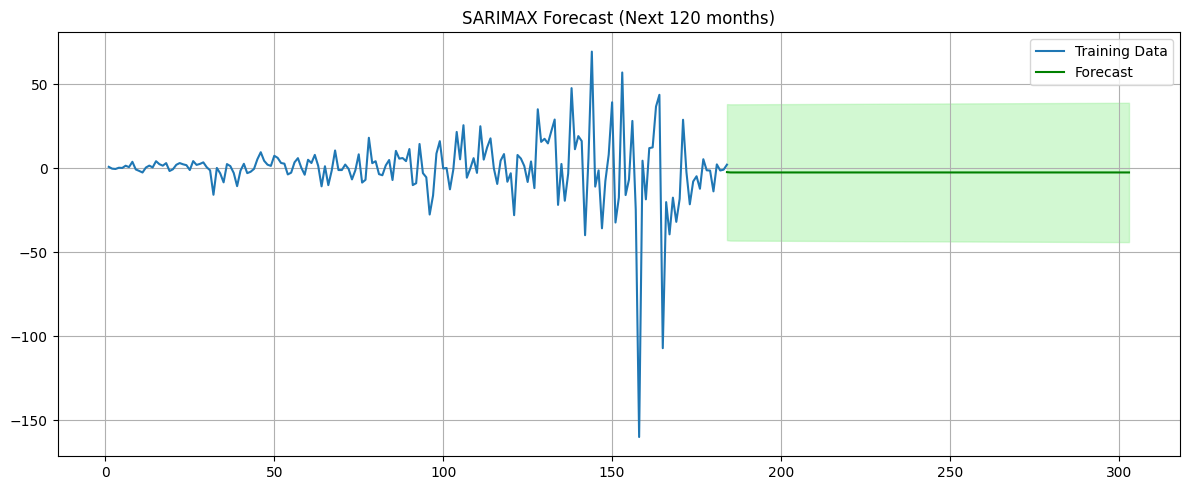

DatetimeIndex(['2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01', '2006-01-01', '2006-02-01',
               '2006-03-01', '2006-04-01',
               ...
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01', '2014-01-01'],
              dtype='datetime64[ns]', name='Date', length=103, freq=None)


In [ ]:
# ✅ 3. Fit SARIMAX model manually (adjust p, d, q as needed)
# Since our second order of differencing increased p-value, and being apprehensive of increasing the p-value on account of further differencing
# I would now revert to conducting SARIMAX on the data resulting from the first-order of differencing,
# as the p-value deviation is mild & just about near the 0.05 threshold

# Start with simple model: (1,d,1)
model = SARIMAX(df_diff1, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
results = model.fit(disp=False)
print(results.summary())

# ✅ 4. Plot diagnostics
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ✅ 5. Forecast next 120 months
forecast = results.get_forecast(steps=120)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# ✅ 6. Plot forecast with confidence intervals
plt.figure(figsize=(12, 5))
plt.plot(df_diff1.index, df_diff1, label="Training Data")
plt.plot(mean_forecast.index, mean_forecast, label="Forecast", color="green")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.4)
plt.title("SARIMAX Forecast (Next 120 months)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(series.index)

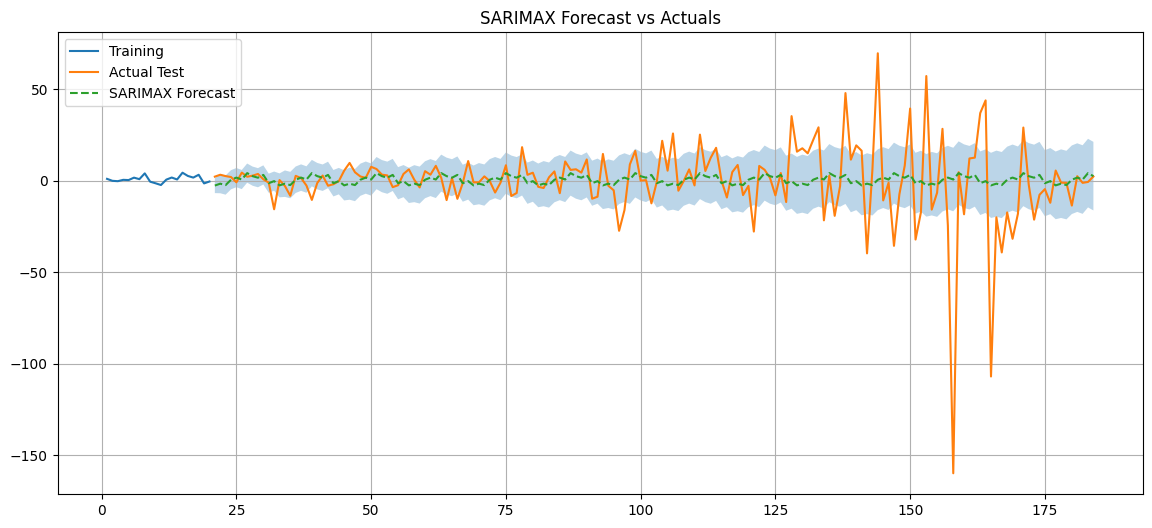

MAE: 12.00
RMSE: 21.73
R2 Score: 0.0006


In [ ]:
train_end_date = '2014-12-31'

#Splitting the time series int training and testing data
y = df['Close_diff1']
y_train = y.loc[:train_end_date]
y_test = y.loc[train_end_date:]


# Fitting the SARIMAX model only on training data
model = SARIMAX(y_train, order=(1,0,1), seasonal_order=(1,1,1,12))
results = model.fit()

#Forecasting for the length of the test set
n_test = len(y_test)
forecast = results.get_forecast(steps=n_test)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

#Comparing forecasts to actual test values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Training')
plt.plot(y_test.index, y_test, label='Actual Test')
plt.plot(pred_mean.index, pred_mean, label='SARIMAX Forecast', linestyle='--')
plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.3)
plt.legend()
plt.title("SARIMAX Forecast vs Actuals")
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, pred_mean)
rmse = np.sqrt(mean_squared_error(y_test, pred_mean))
r2 = r2_score(y_test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

At this point, going by the above, the SARIMAX model in its current configuration is not performing adequately. We might take a chance to see if SARIMAX works well with our original data series.

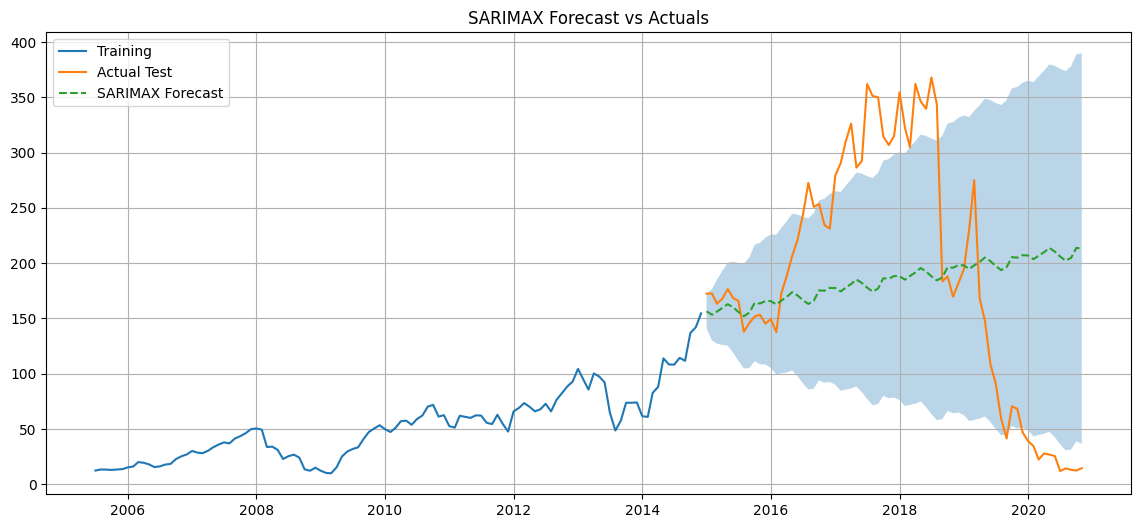

MAE: 96.27
RMSE: 117.61
R2 Score: -0.1512


In [ ]:
train_end_date = '2014-12-31'

#Splitting the time series int training and testing data
y = stock_data['Close']
y_train = y.loc[:train_end_date]
y_test = y.loc[train_end_date:]


# Fitting the SARIMAX model only on training data
model = SARIMAX(y_train, order=(1,0,1), seasonal_order=(1,1,1,12))
results = model.fit()

#Forecasting for the length of the test set
n_test = len(y_test)
forecast = results.get_forecast(steps=n_test)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

#Comparing forecasts to actual test values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Training')
plt.plot(y_test.index, y_test, label='Actual Test')
plt.plot(pred_mean.index, pred_mean, label='SARIMAX Forecast', linestyle='--')
plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.3)
plt.legend()
plt.title("SARIMAX Forecast vs Actuals")
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, pred_mean)
rmse = np.sqrt(mean_squared_error(y_test, pred_mean))
r2 = r2_score(y_test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

The R2 score is still worse than our previous result. Hence, the above data configuration wouldn't favour satisfactory stock price predictions, and the data might need further tweaking/feature selections, however anything of that sort would have to undergo trial-and-error to come up with a satisfactory resolution.

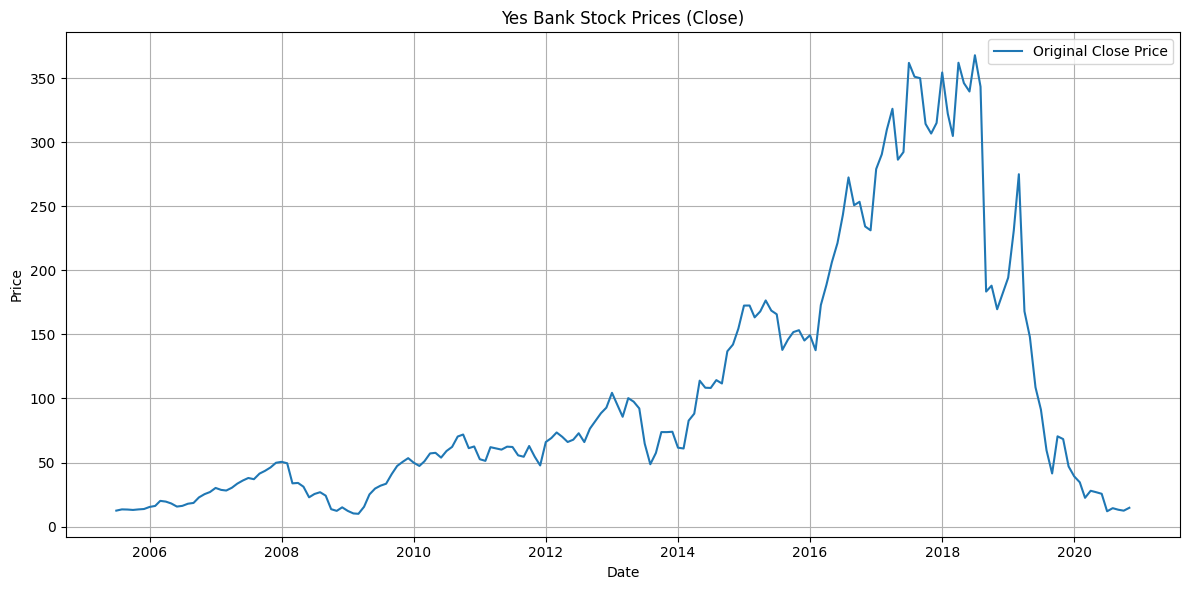

In [ ]:
# Step 1: Data Cleaning & Preparation
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.set_index('Date', inplace=True)
df = df.sort_index()
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df[['Close']].dropna()

# Step 2: Visualize the original Close price
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Close Price')
plt.title("Yes Bank Stock Prices (Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



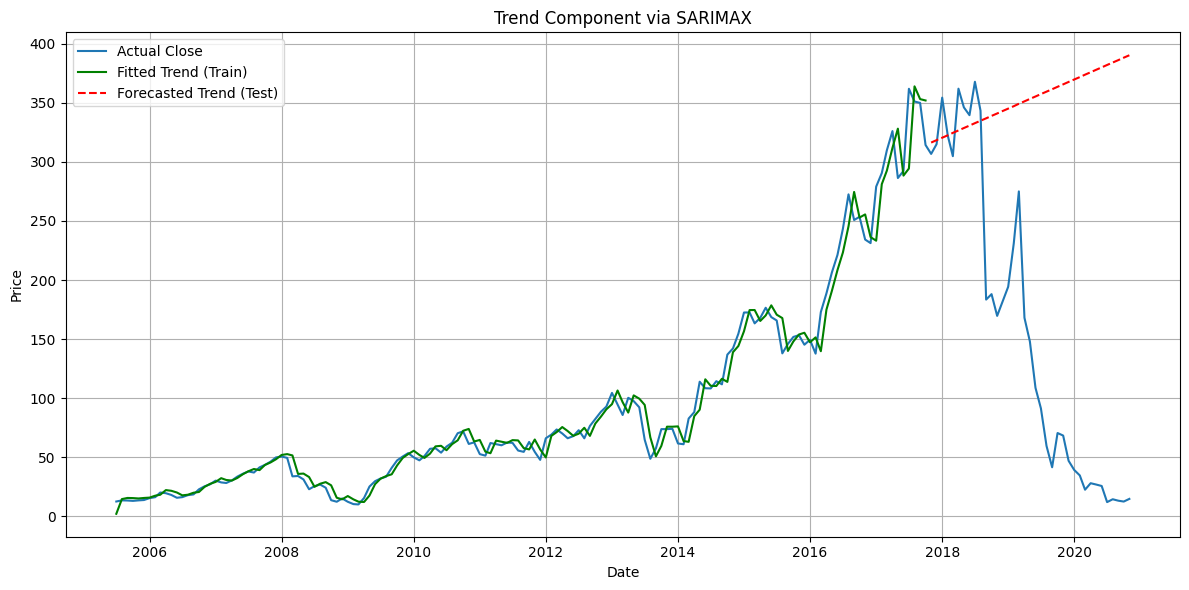

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Step 3: Split the dataset
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 4: Fit SARIMAX to extract the trend (use simple order to capture overall trend)
sarimax_trend = SARIMAX(train['Close'], order=(0, 1, 0), trend='c')
trend_model = sarimax_trend.fit(disp=False)

# Forecast the trend for the full dataset (including test)
trend_fitted = trend_model.fittedvalues
trend_forecast = trend_model.predict(start=test.index[0], end=test.index[-1])

# Step 5: Visualize extracted + forecasted trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Actual Close")
plt.plot(trend_fitted.index, trend_fitted, label="Fitted Trend (Train)", color='green')
plt.plot(trend_forecast.index, trend_forecast, label="Forecasted Trend (Test)", color='red', linestyle='--')
plt.title("Trend Component via SARIMAX")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


As shpwn by the graph, the rising trend deviates mid-year 2017 and henceforwards wherein we witness a lot of volatility post which the graphs descends into a fall. Hence, we would consider data from 2017 for a detrending assessment for better predictability based on trends (training data).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")

stock_2017 = stockdata.iloc[:150]

# Helper function for ADF test
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] < 0.05  # Returns True if stationary

# Decomposition
res = seasonal_decompose(stock_2017['Close'], model='additive', extrapolate_trend='freq')
trend_component = res.trend
detrended_values = stock_2017['Close'].values - trend_component.values

# Create proper DataFrame with datetime index
# Detrended DataFrame
detrended = pd.DataFrame({'detrended': detrended_values}, index=stock_2017.index)
detrended = detrended.dropna()  # Drop NaNs introduced by trend

# ADF Test
adf_test(detrended['detrended'])

# Train-test split
train_2017 = detrended.iloc[:138]
test_2017= detrended.iloc[138:150]
y_train = train_2017['detrended']

# Define p, d, q range
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Seasonal orders: assuming monthly data with seasonality = 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y_train,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best SARIMA order based on AIC: {best_order}")
print(f"Best Seasonal order: {best_seasonal_order}")

# Fit SARIMAX model (use order suggested by auto_arima, e.g., (4, 0, 2))
model = SARIMAX(train_2017['detrended'], order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit(maxiter=200)

# Printing Results Summary
print(result.summary())

# Prediction
start = len(train_2017)
end = start + len(test_2017) - 1
pred = result.predict(start=start, end=end, dynamic=False)
pred.index = test_2017.index  # Align index

# Combine with actual
comparison_df = pd.DataFrame({
    'Actual': test_2017['detrended'],
    'Predicted': pred
})
print(comparison_df)

ADF Statistic: -5.548965084322993
p-value: 1.6362791843215881e-06
Best AIC: 665.8411701409398
Best SARIMA order based on AIC: (2, 0, 2)
Best Seasonal order: (1, 2, 2, 12)
                                     SARIMAX Results                                      
Dep. Variable:                          detrended   No. Observations:                  138
Model:             SARIMAX(2, 0, 2)x(1, 2, 2, 12)   Log Likelihood                -324.921
Date:                            Fri, 08 Aug 2025   AIC                            665.841
Time:                                    15:06:58   BIC                            685.568
Sample:                                07-01-2005   HQIC                           673.785
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

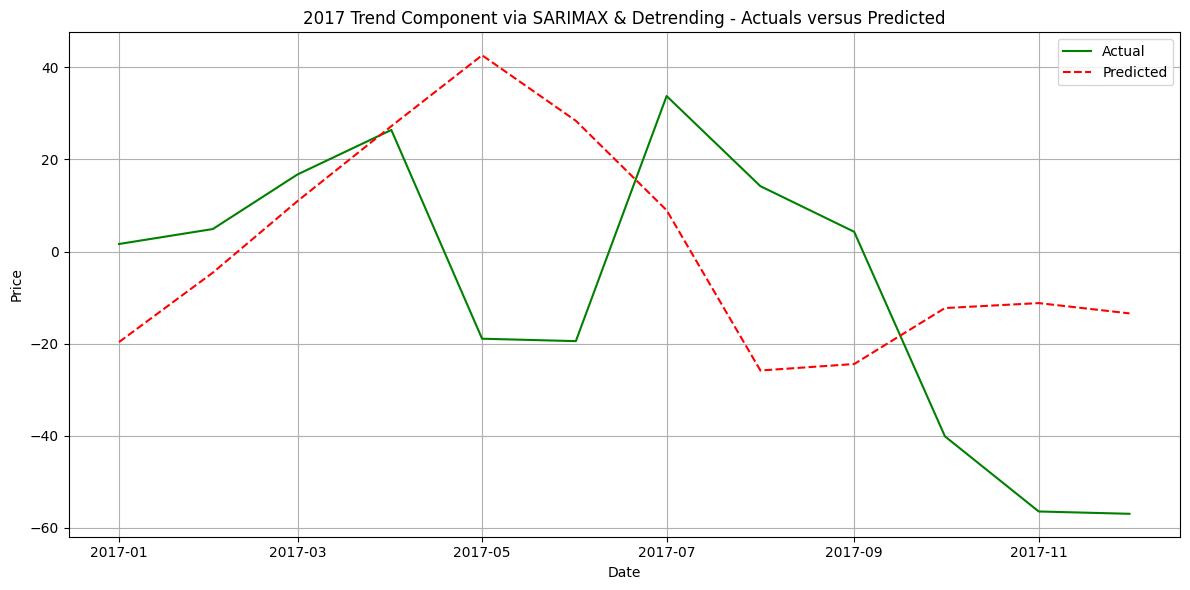

In [ ]:
# Visualizing 2017 - Actuals versus Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label="Actual", color='green')
plt.plot(comparison_df.index, comparison_df['Predicted'], label="Predicted", color='red', linestyle='--')
plt.title("2017 Trend Component via SARIMAX & Detrending - Actuals versus Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


As we can see from the above graph, most of the forecasted predictions catch on with the significant trend, although the predictions by themselves are not exactly a mirror reflection of the actual outcomes.

#*CONCLUSION:*

We have tried various forms of algorithms of which were the following applications to arrive at acceptable or excellent prediction results -

- 1. Post-data scaled data (Linear Regression and Random Forest) using original variables (Open, High, Low)
- 2. Post-data scaling data (Linear Regression, Ridge, Lasso, Elastic Net, Gradient Boost, XGBoost, K-Nearest Neighbours, Support Vector Regression, Bayesian Ridge, Random Forest) using uncorrelated varibales (Month, Year, High-Low, Open-Close, Close)
- 3. Combination with Prophet (Linear Regression, Bayesian Ridge, Random Forest)
- 4. SARIMAX Forecasts (original data and differencing to look for stationarity)
- 5. SARIMAX Forecasts in combination with detrending

**Recommendations:**

Most methods, especially all of the algorithms post-data scaling (2nd point) as well as the Prophet combinations with Linear Regression and Bayesian Ridge have excelled at giving out predictions, as all of their respective R2 scores were very high. SARIMAX Forecasts in combination with detrending too has yielded better results, as the p-value was extremely low (much below than 0.05 threshold), provided we keep out consideration of seasonal trends and volatile changes in stock prices. Hence we recommend institutional investors and shareholders to use the results of these algorithms for better stock price predictability.

The rest of the algorithm methods used involving pre-data scaling (linear regression and random forests) as well as the Prophet combination with Random Forest and SARIMAX Forecasts (original data and with differencing) have all resulted in respective poor R2 scores (close to 0 or below 0), and therefore these are less reliable algorithms, the utility of which we discourage to the investors/shareholders.